#                          Machine LearningInternship technohacks
                                         

#                                Task 3 : Diabetes Prediction
                     Use a dataset containing medical data of patients to predict if a person has diabetes or not.

import important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

read data from csv file

In [3]:
data=pd.read_csv('diabetes.csv')

In [4]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Explore the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

check if data have any null values

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

check data type of columes 

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

identify data shape

In [10]:
data.shape

(768, 9)

# Data distribution

draw pair plot to every colums in data  with outcome

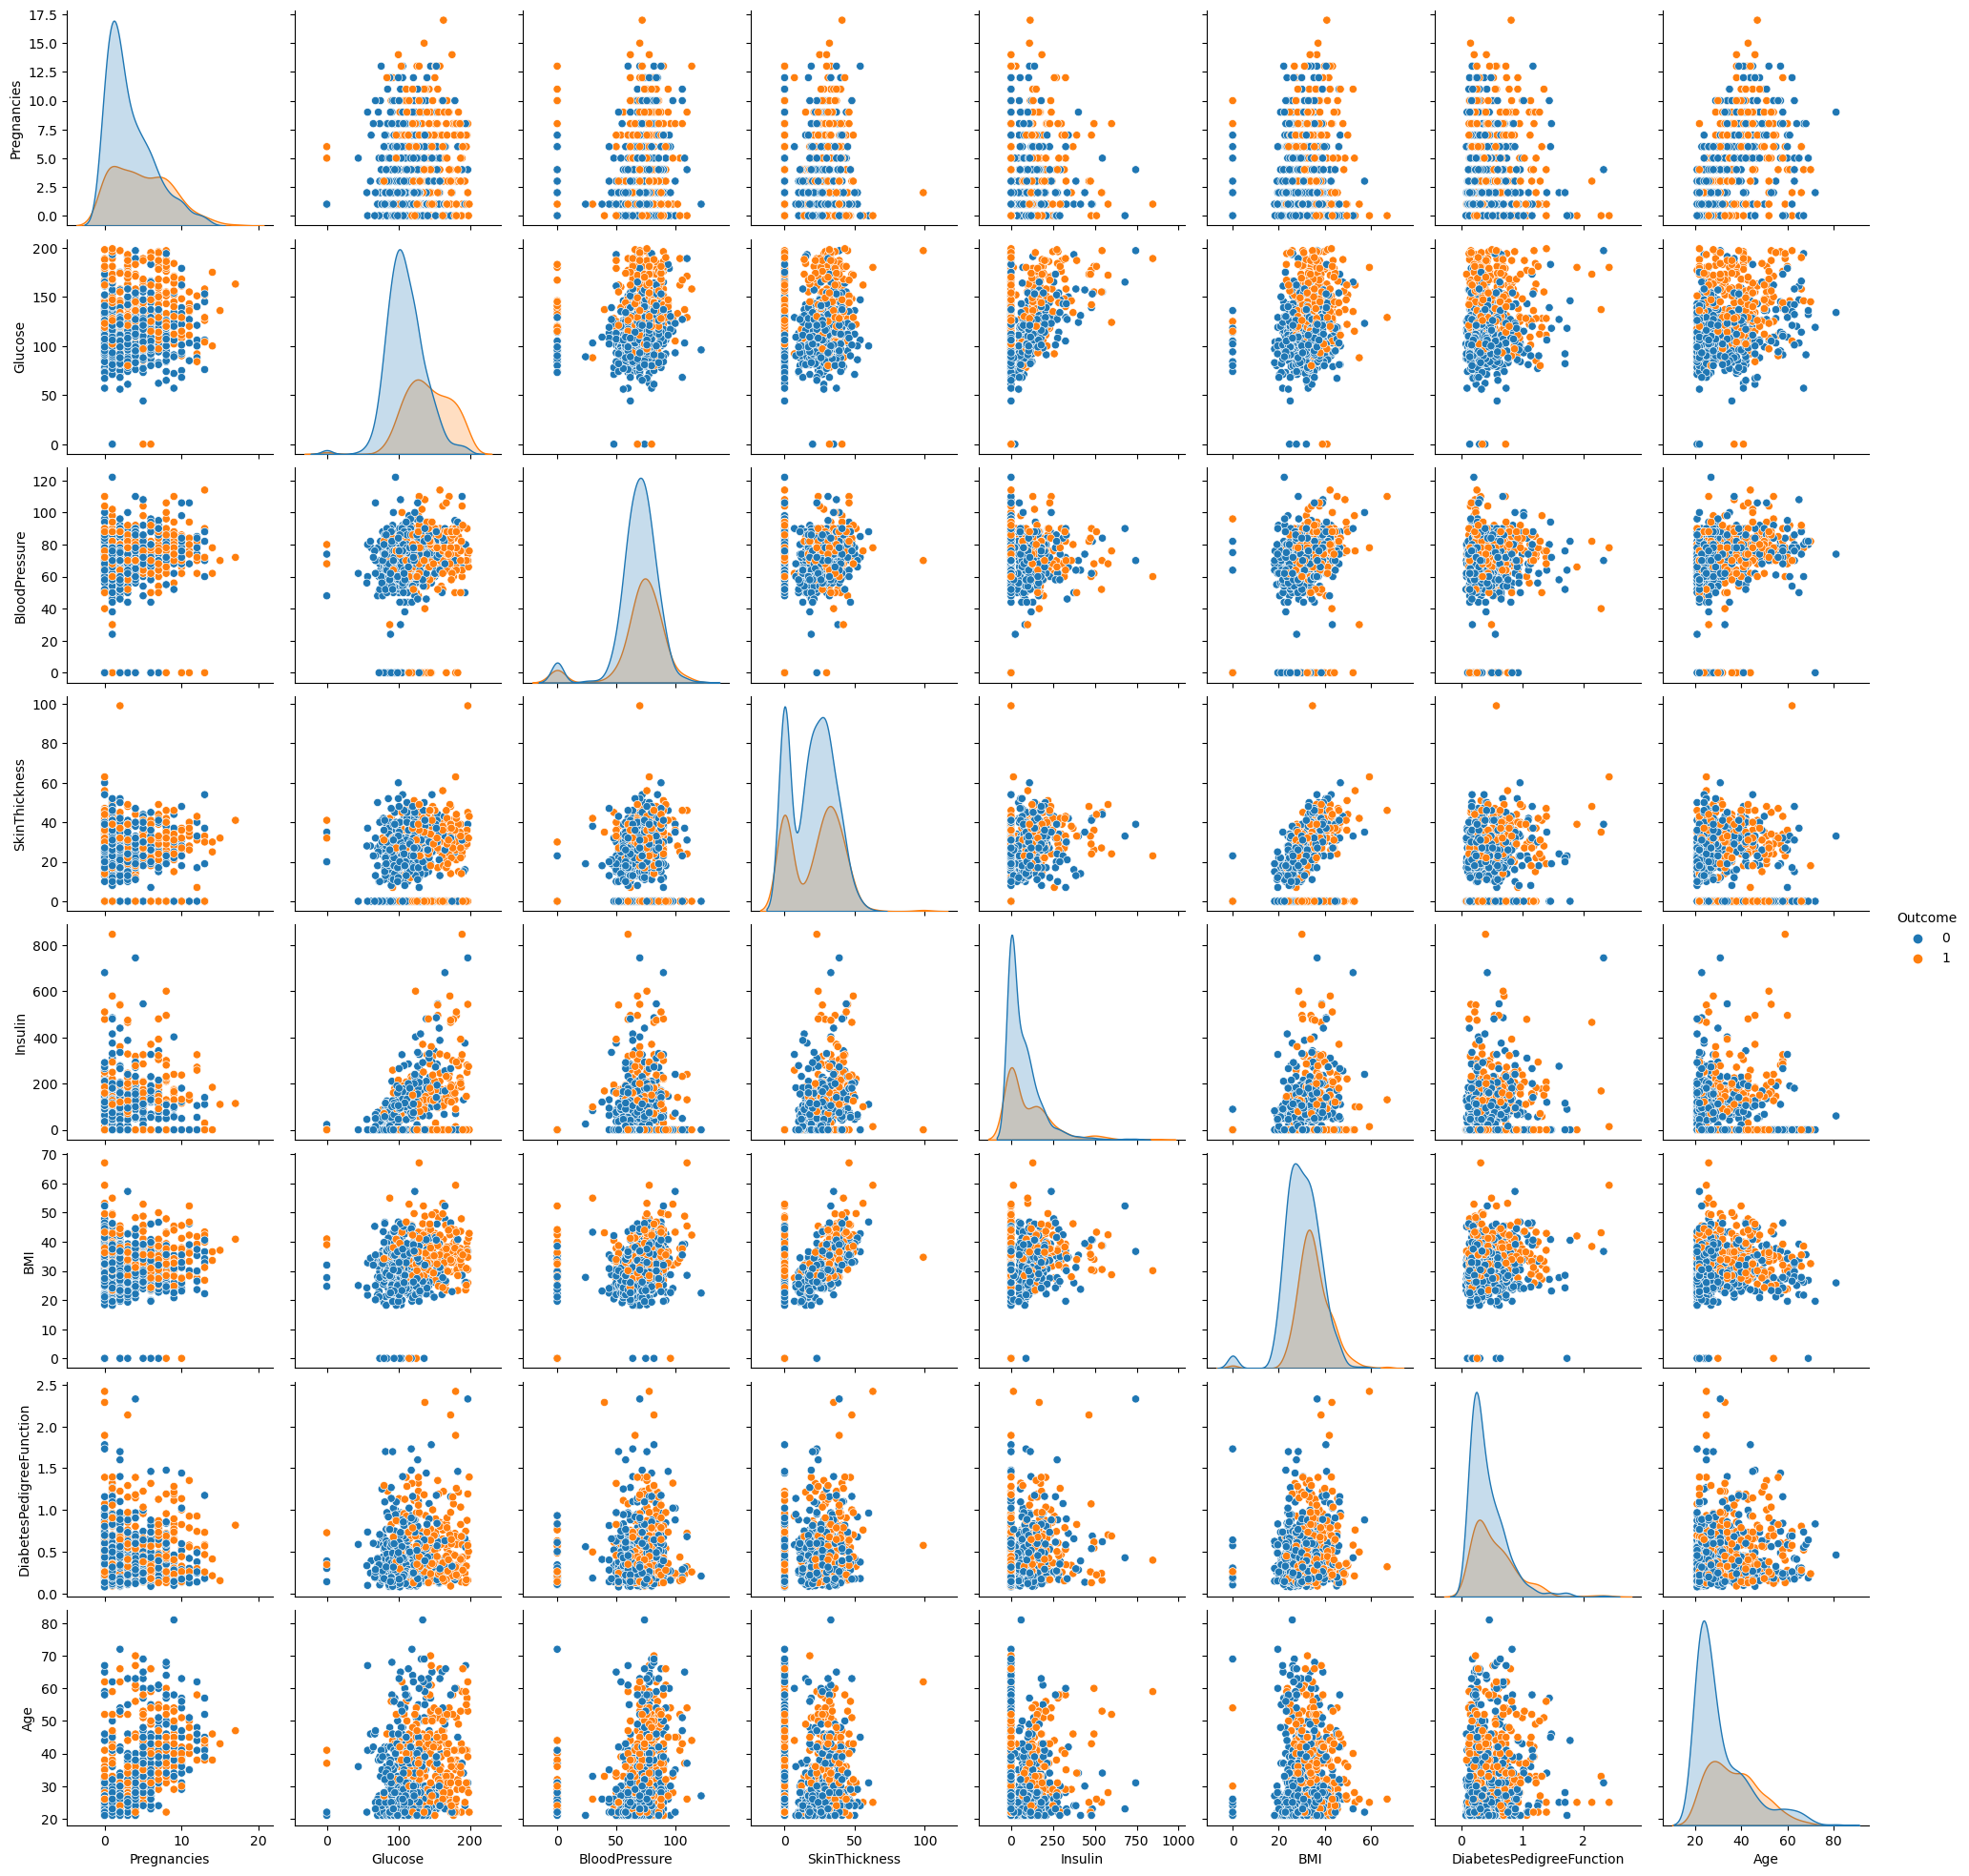

In [11]:
p=sns.pairplot(data, hue = 'Outcome')

divide Glucose values in to 5 parts to draw it in histogram 

In [12]:
data["Glucose"] = pd.cut(data["Glucose"],bins=[-1, 40, 80, 120, 160, np.inf],labels=[1, 2, 3, 4, 5])

In [13]:
data["Glucose"]

0      4
1      3
2      5
3      3
4      4
      ..
763    3
764    4
765    4
766    4
767    3
Name: Glucose, Length: 768, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

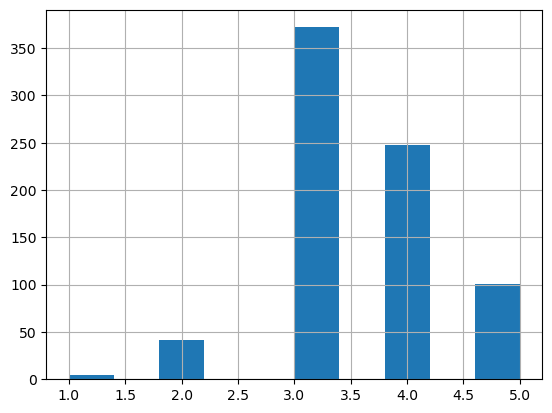

In [16]:
data["Glucose"].hist()
plt.show()

draw heatmap for all data

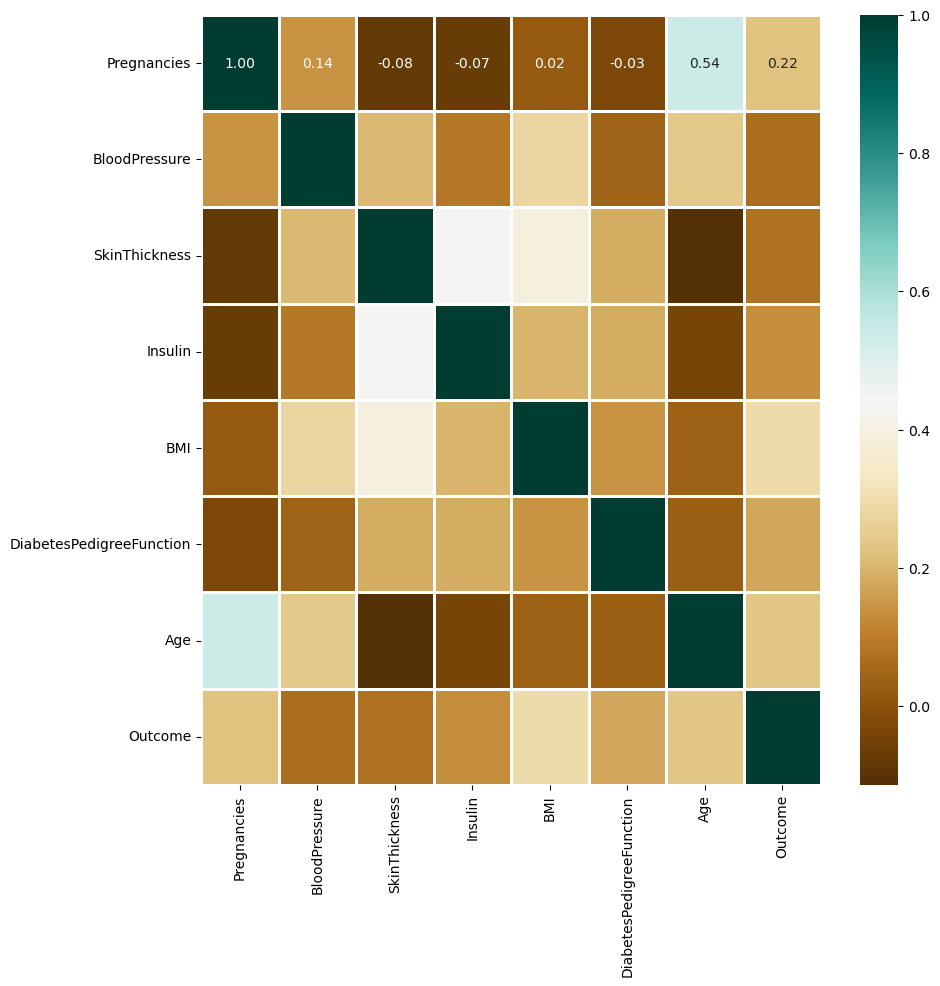

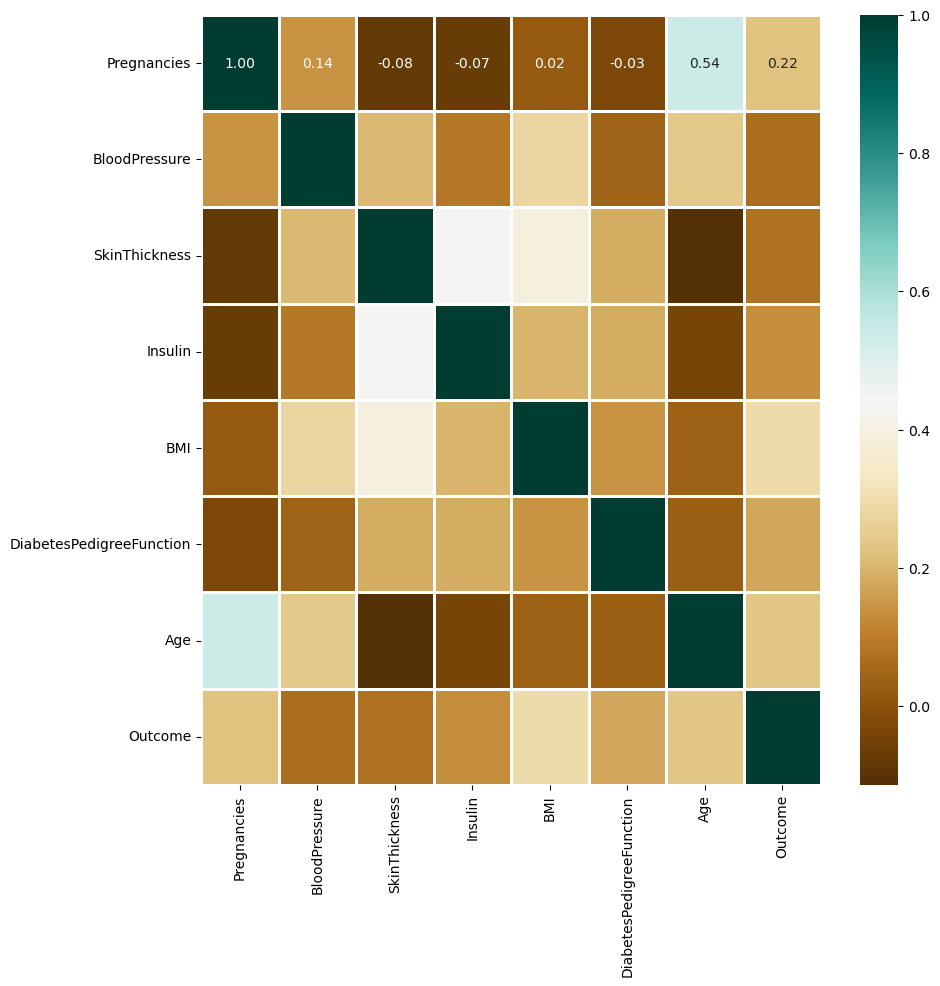

In [18]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)
plt.show()

darw barplot between outcome and insuline

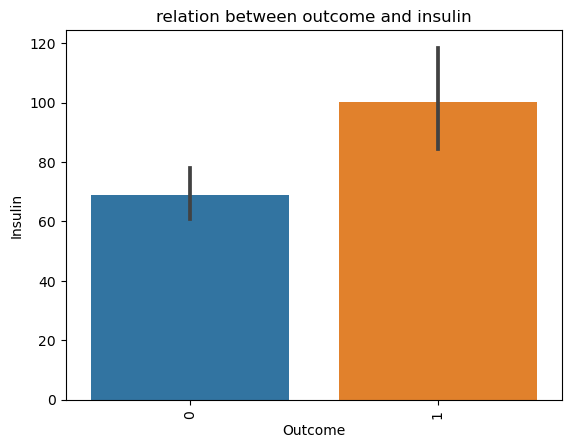

In [21]:
plt.title('relation between outcome and insulin')
plt.xticks(rotation=90)
sns.barplot(x=data['Outcome'],y=data['Insulin'])
plt.show()

draw histogram for all data

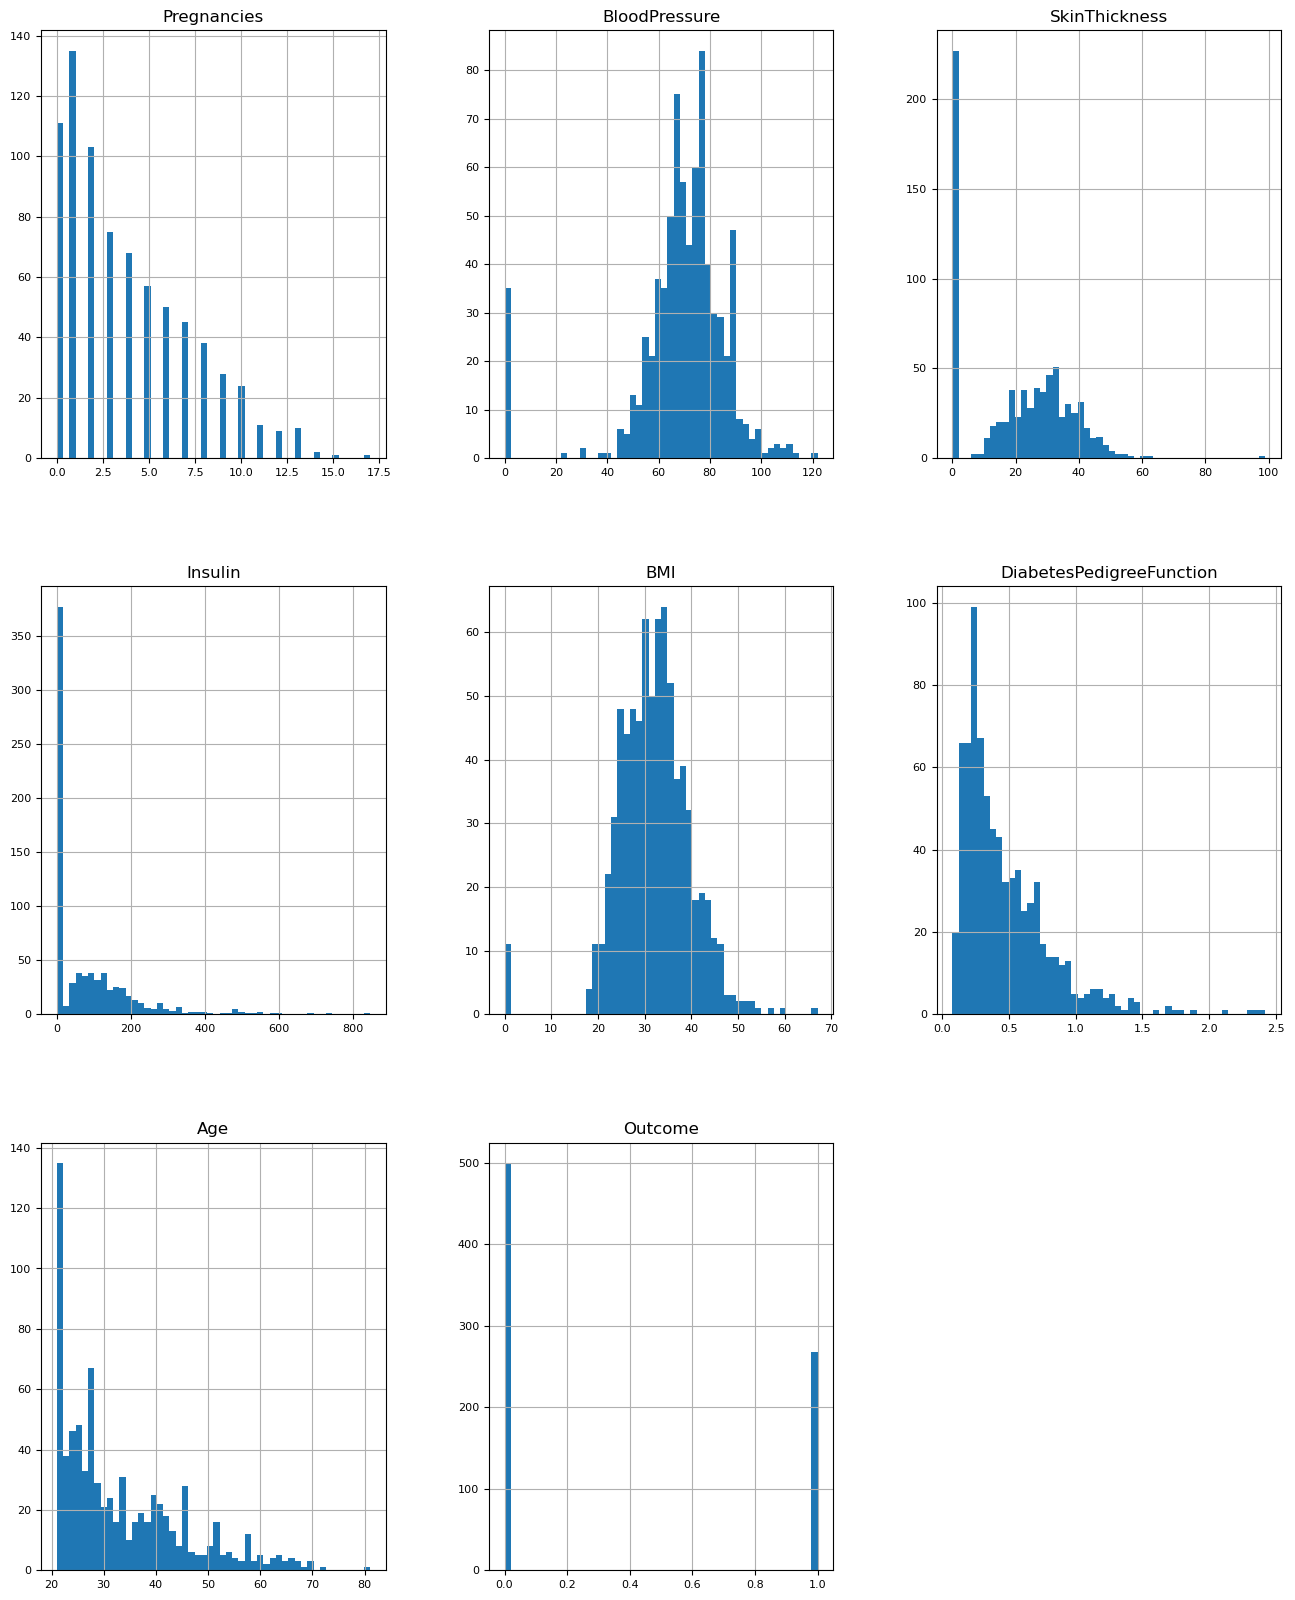

In [22]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

draw implot for BMI and age

<Figure size 1000x700 with 0 Axes>

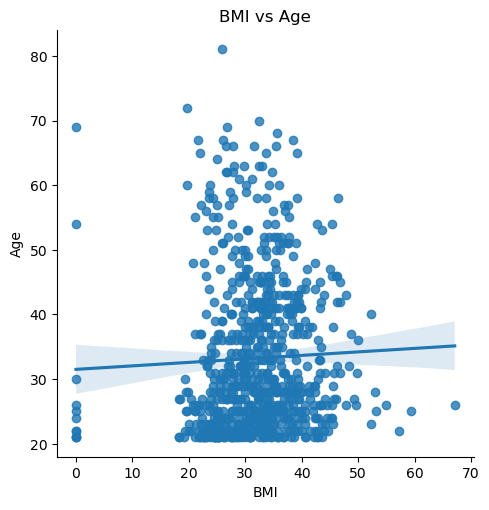

In [23]:
plt.figure(figsize=(10, 7))

sns.lmplot(x="BMI", y="Age", data=data);
plt.title("BMI vs Age")
plt.show()

A kdeolot with Pregnancies and Outcome when it postive and negative

<Figure size 1300x600 with 0 Axes>

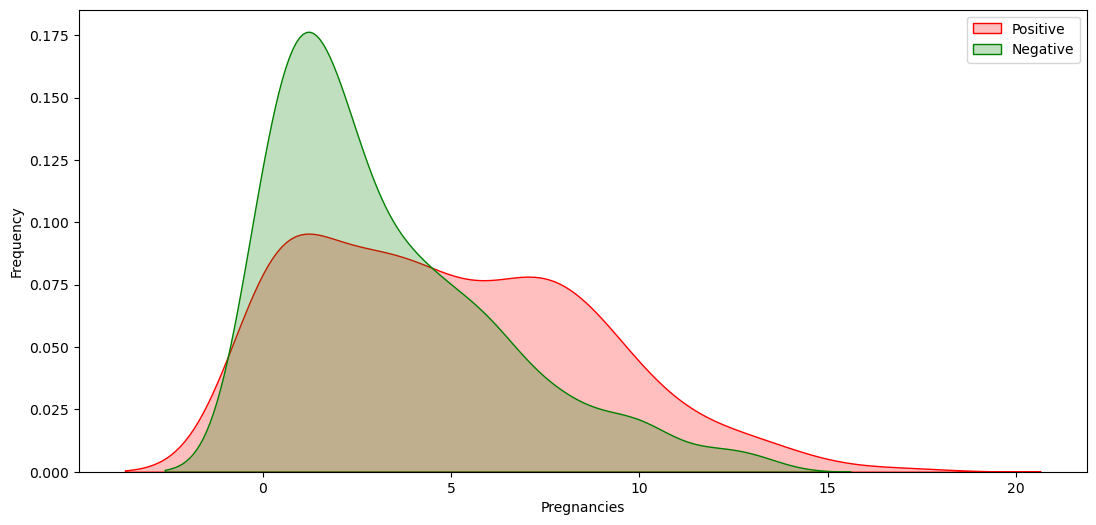

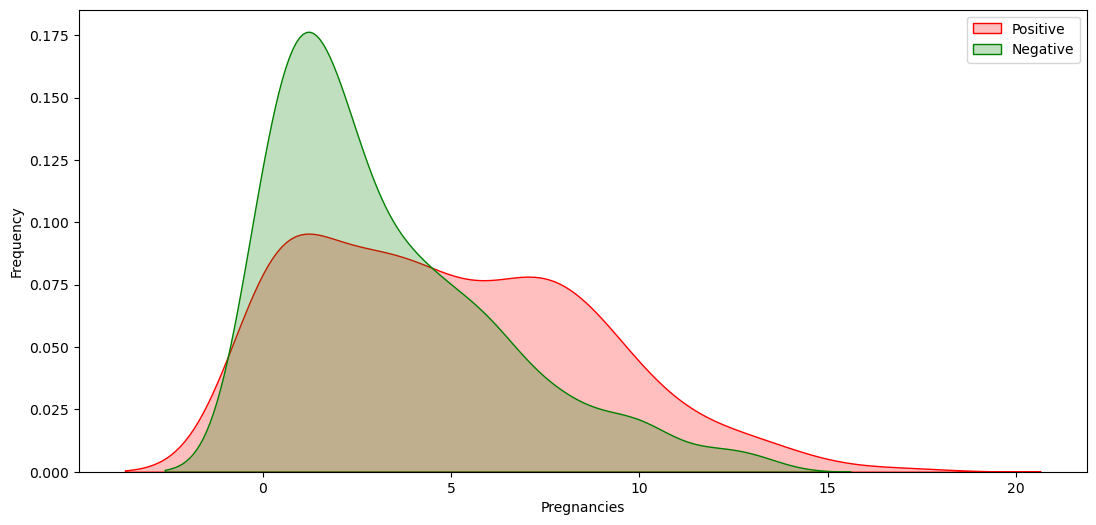

In [26]:
plt.figure(figsize=(13,6))
g = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])
plt.show()

draw count plot for outcome 0,1  negative is the mostly in our data

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


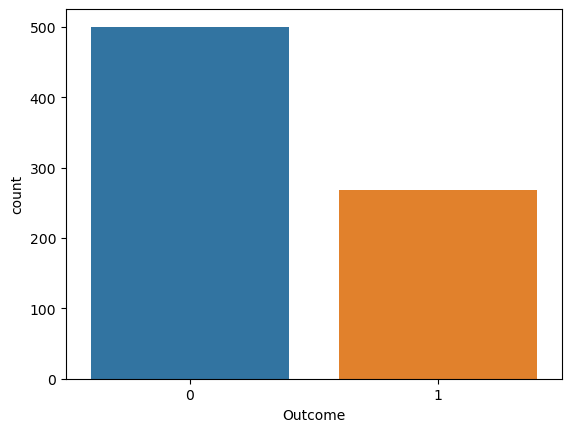

In [28]:
sns.countplot('Outcome', data = data)
plt.show()

draw a scatter matrix for all data

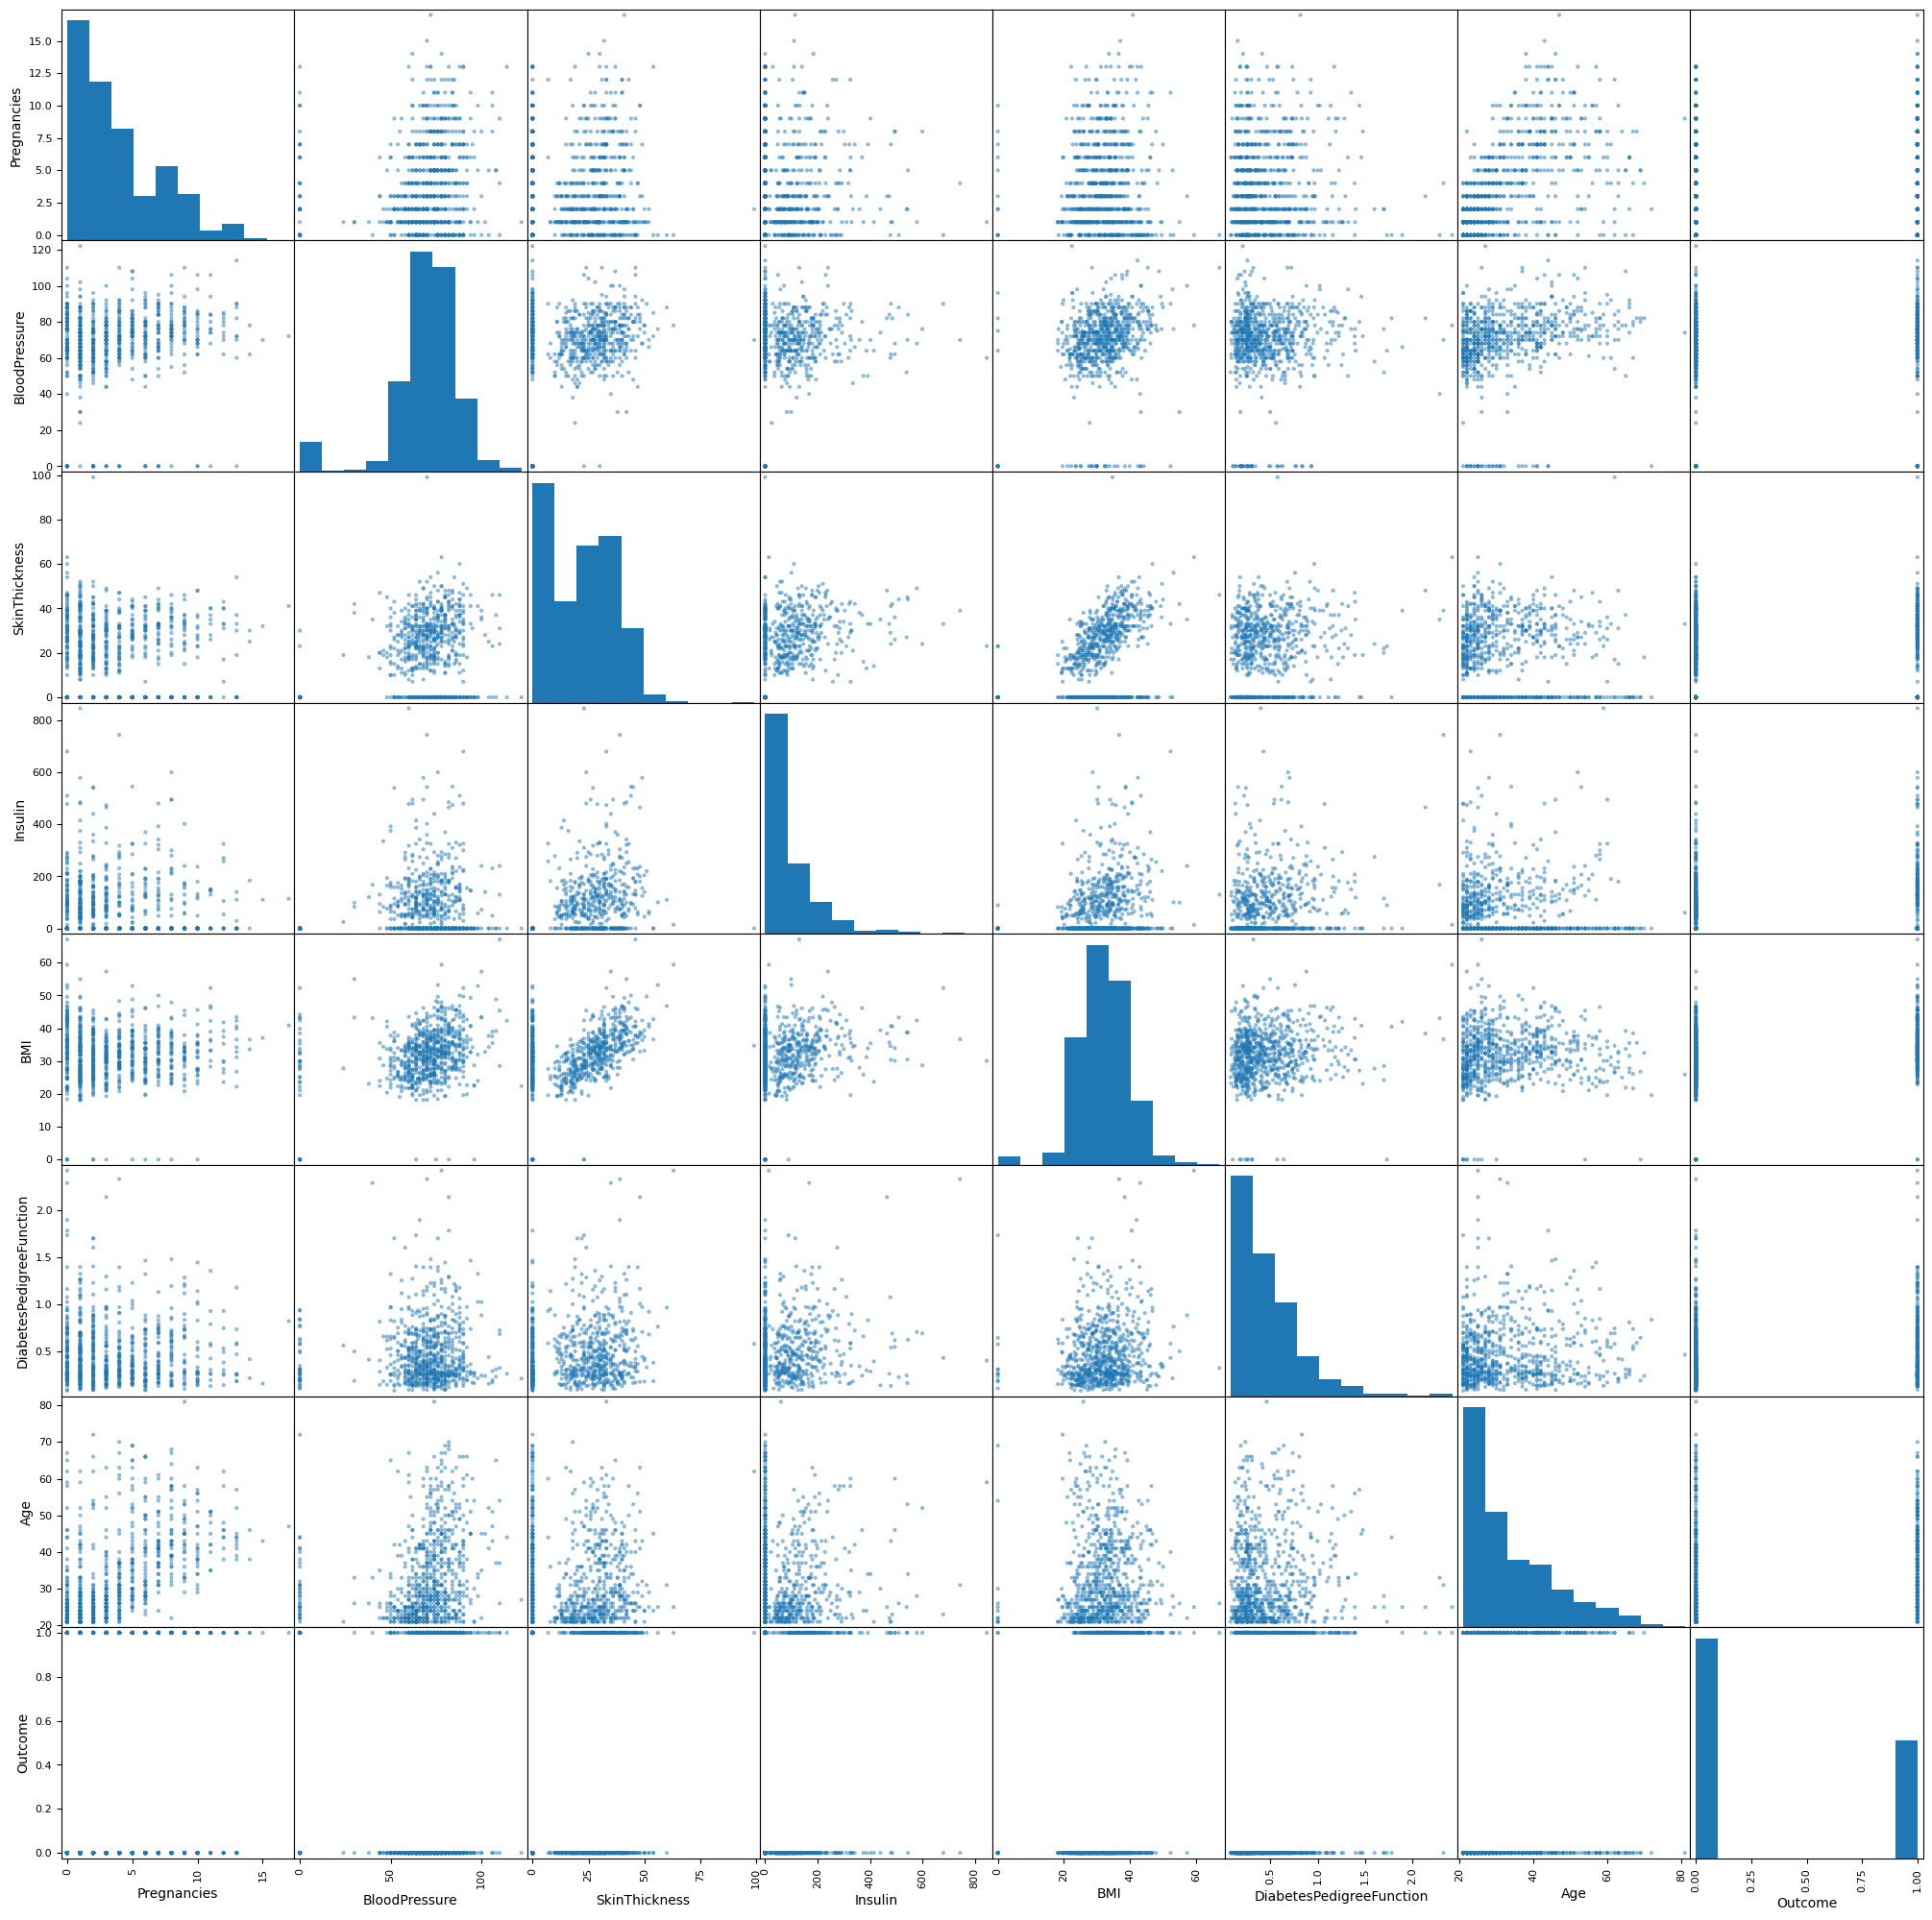

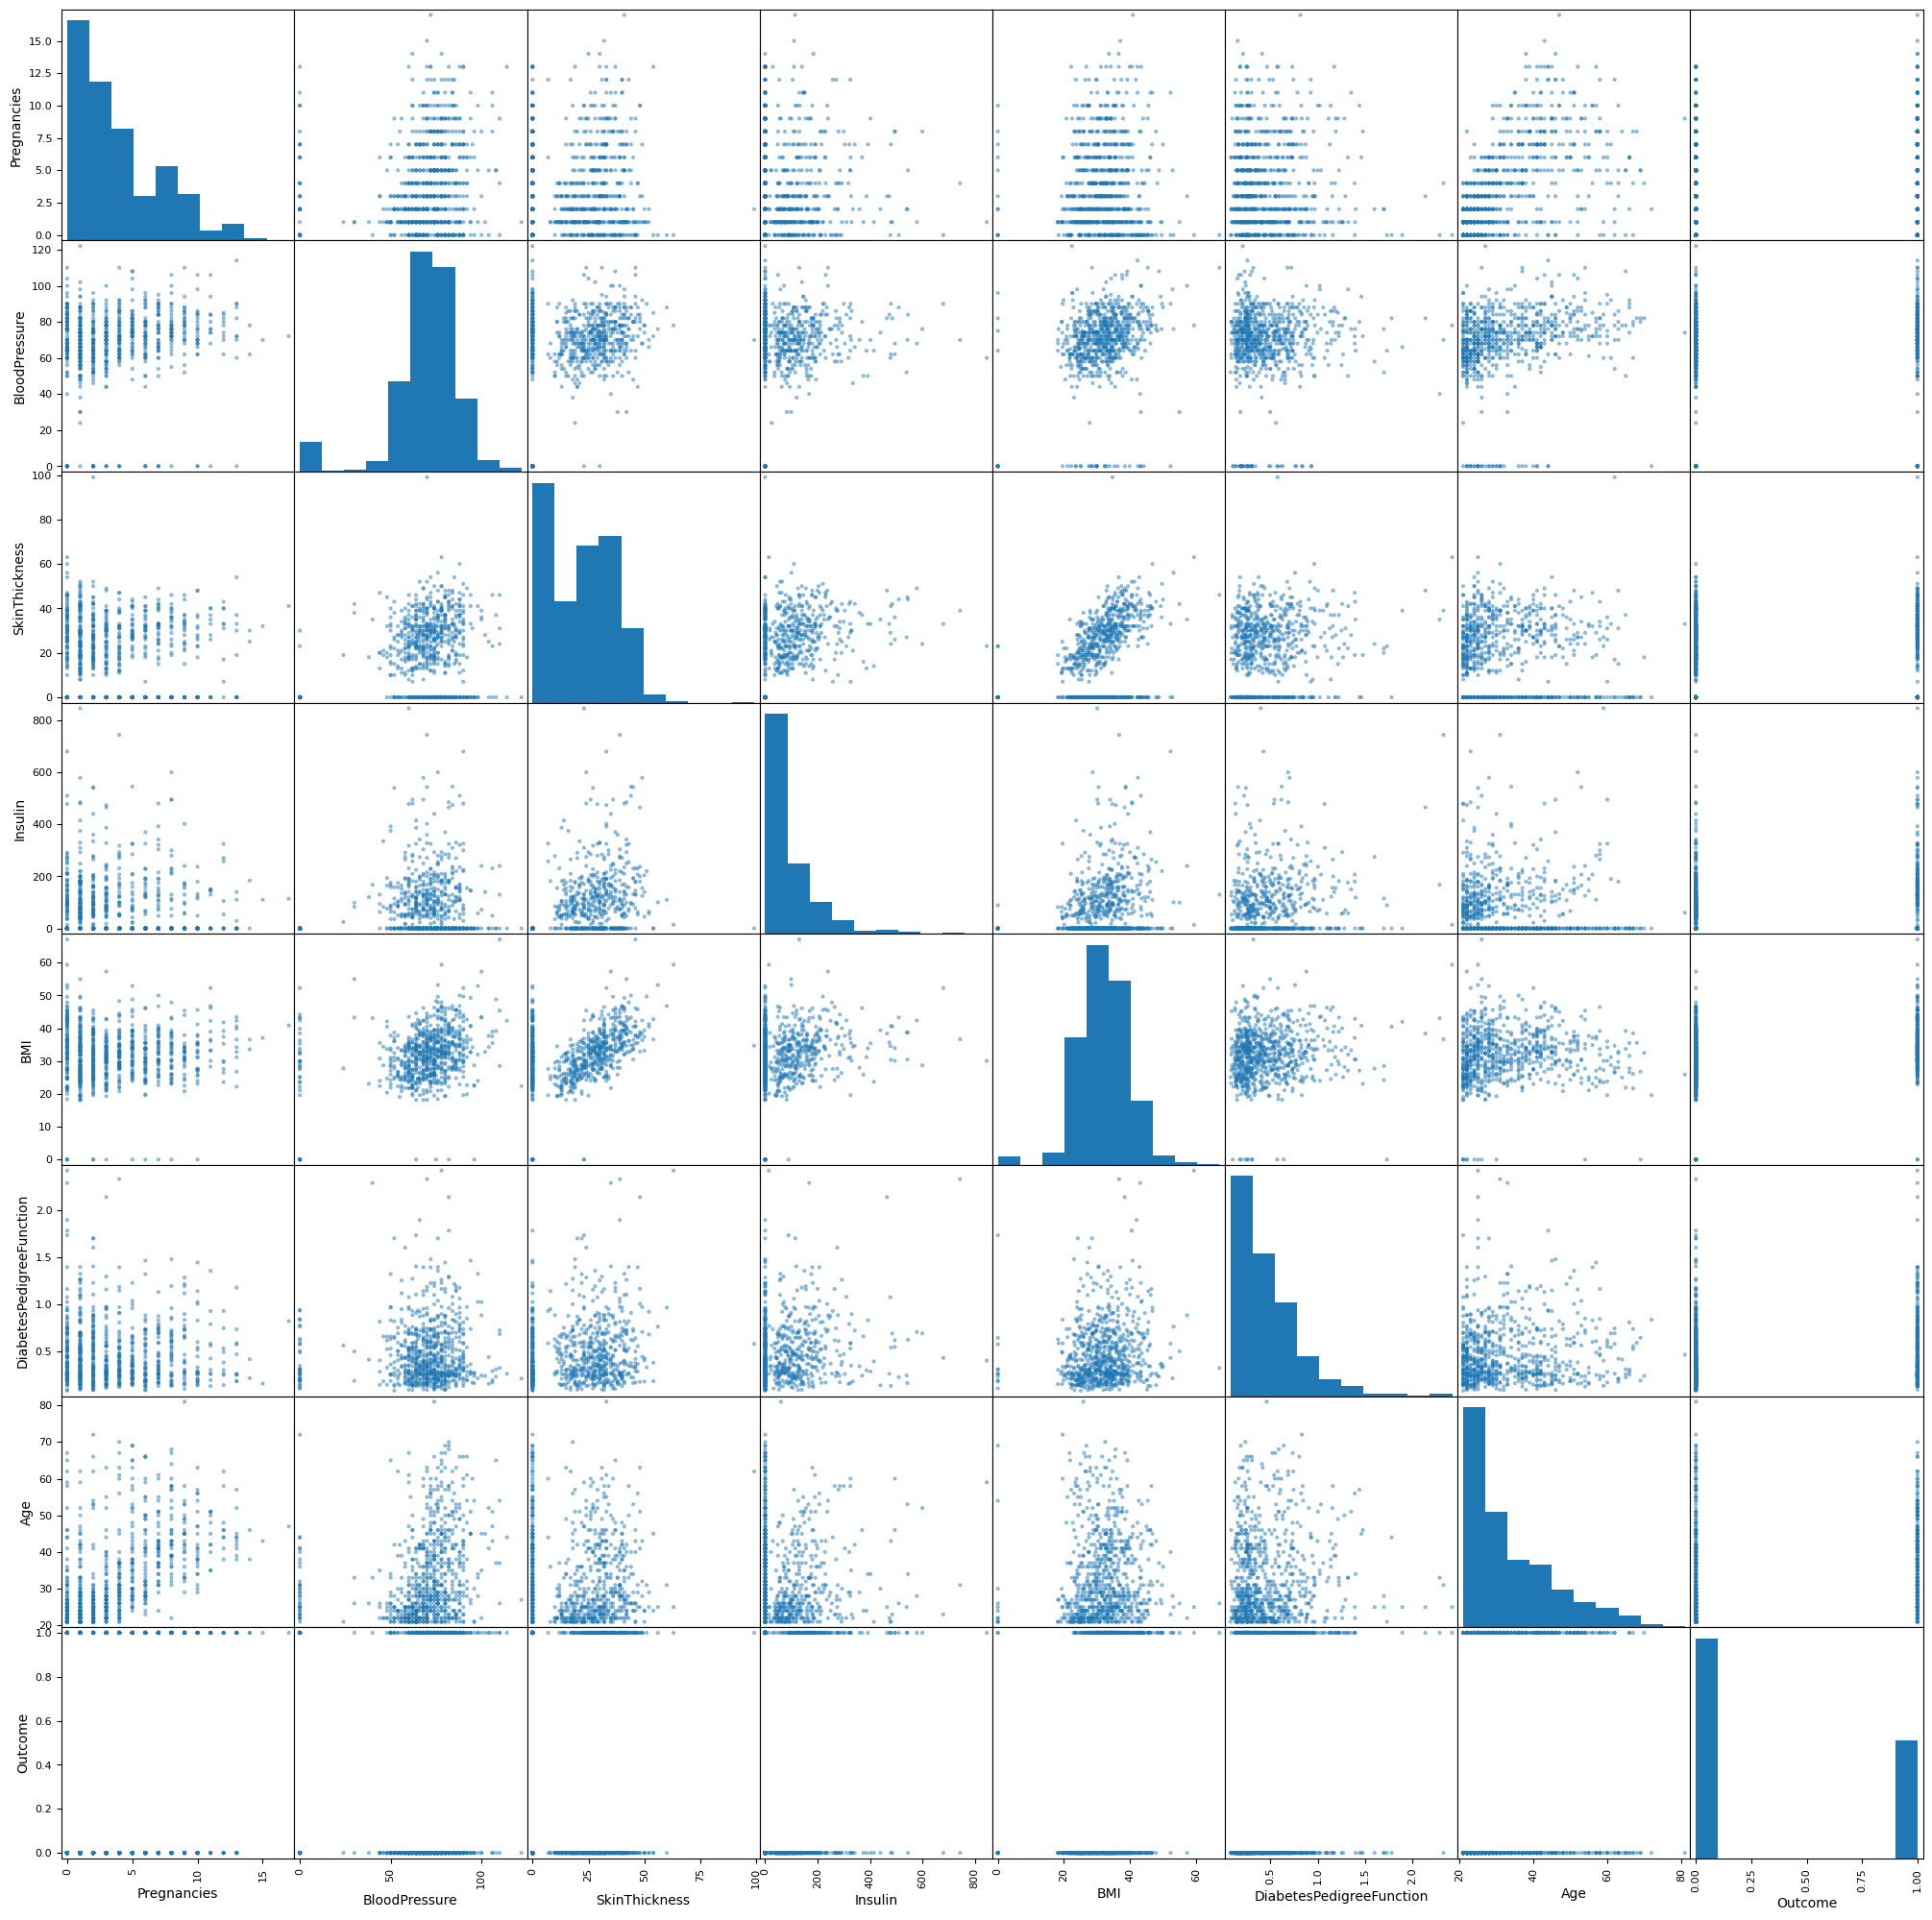

In [30]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(25, 25))
plt.show()

draw a bar plot between Glucose and BloodPressure

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


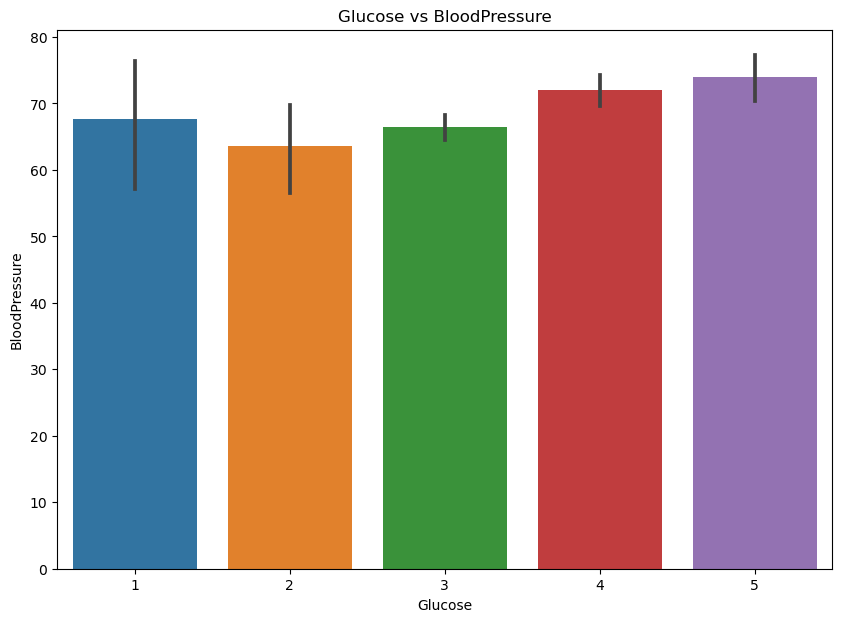

In [47]:
plt.figure(figsize=(10, 7))
plt.title("Glucose vs BloodPressure")
sns.barplot('Glucose', 'BloodPressure', data=data)
plt.xlabel('Glucose', )
plt.ylabel('BloodPressure')
plt.show()

draw implot to BMI and DiabetesPedigreeFunction

<Figure size 1000x700 with 0 Axes>

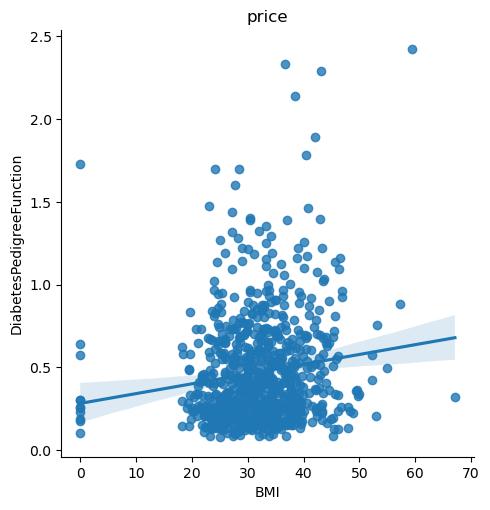

In [49]:

plt.figure(figsize=(10, 7))

sns.lmplot(x="BMI", y="DiabetesPedigreeFunction", data=data);
plt.title("BMI and DiabetesPedigreeFunction")
plt.show()

draw scatterplot between BloodPressure and Age with hue Outcome

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


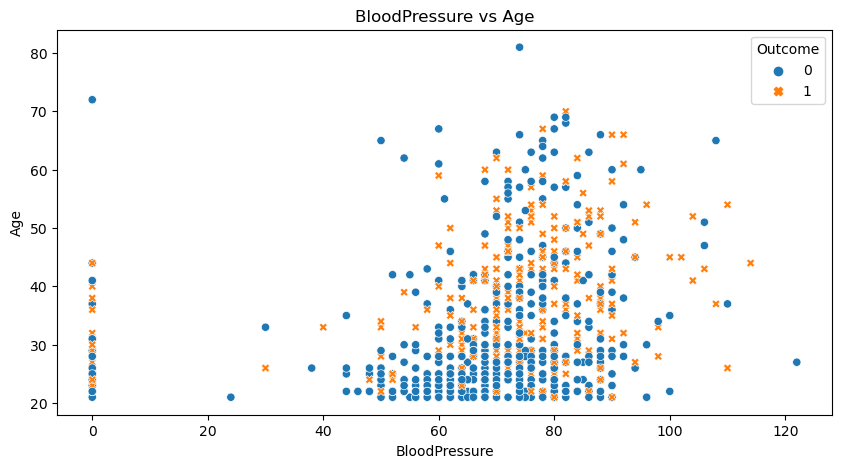

In [31]:
plt.figure(figsize=(10, 5))

sns.scatterplot('BloodPressure', 'Age',data=data,hue="Outcome", style="Outcome")
plt.title("BloodPressure vs Age")

plt.xlabel("BloodPressure")
plt.ylabel('Age')
plt.show()

draw dinsty plot to DiabetesPedigreeFunction

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


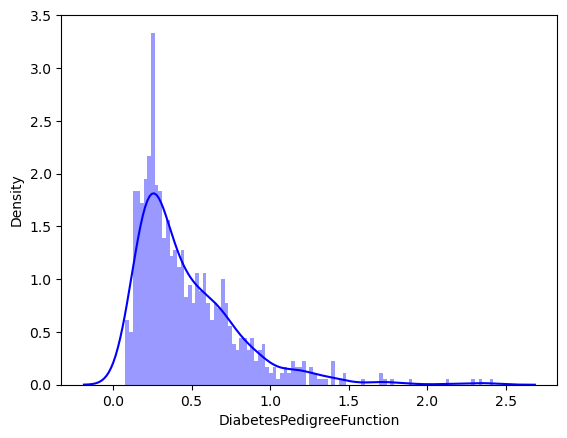

In [32]:
sns.distplot(data['DiabetesPedigreeFunction'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.show()

draw line plot to Pregnancies and Glucose with BloodPressure

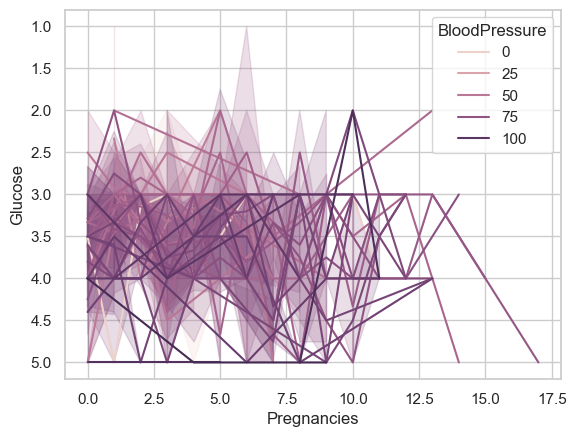

In [33]:
sns.set_theme(style="whitegrid")
sns.lineplot(x="Pregnancies", y="Glucose",hue="BloodPressure",data=data)
plt.show()

draw relplot for Pregnancies and Glucose with SkinThickness

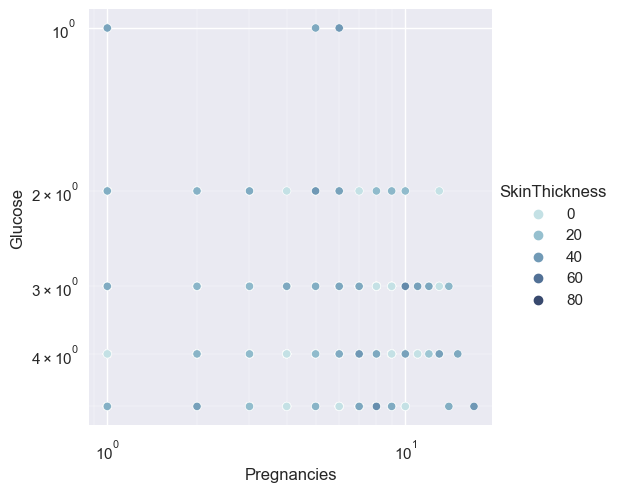

In [34]:
sns.set_theme(style="darkgrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(data=data,x="Pregnancies", y="Glucose",hue="SkinThickness",palette=cmap, sizes=(10, 200),)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.show()

draw violinplot for Outcome and Glucose

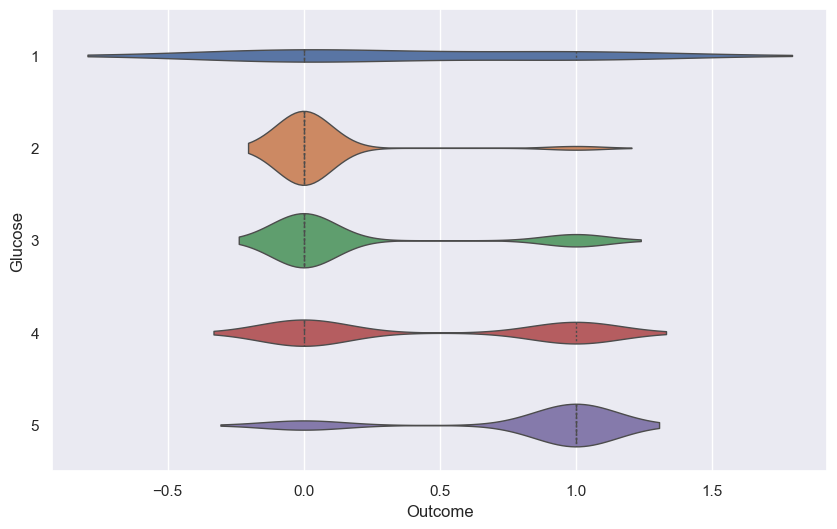

In [35]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data, x="Outcome", y="Glucose",split=True, inner="quart", linewidth=1)
plt.show()

draw violinplot for Outcome and SkinThickness

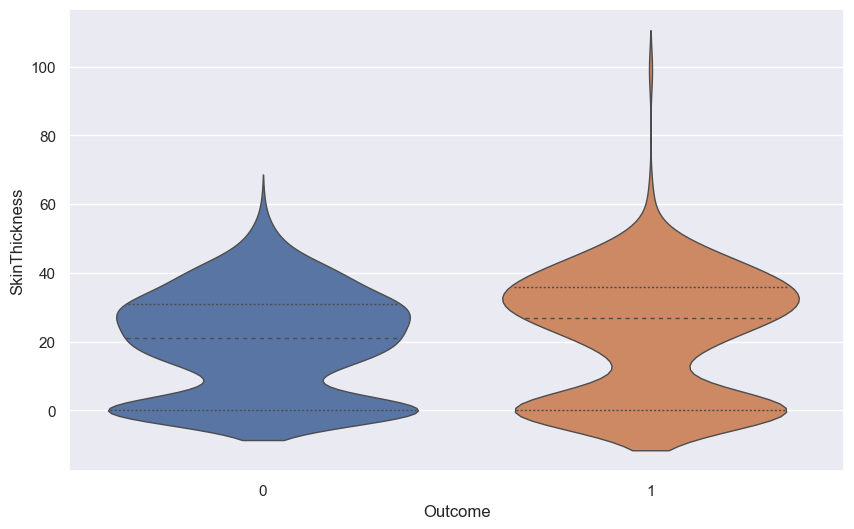

In [36]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data, x="Outcome", y="SkinThickness",split=True, inner="quart", linewidth=1)
plt.show()

draw scatterplot for Glucose and BMI with Age

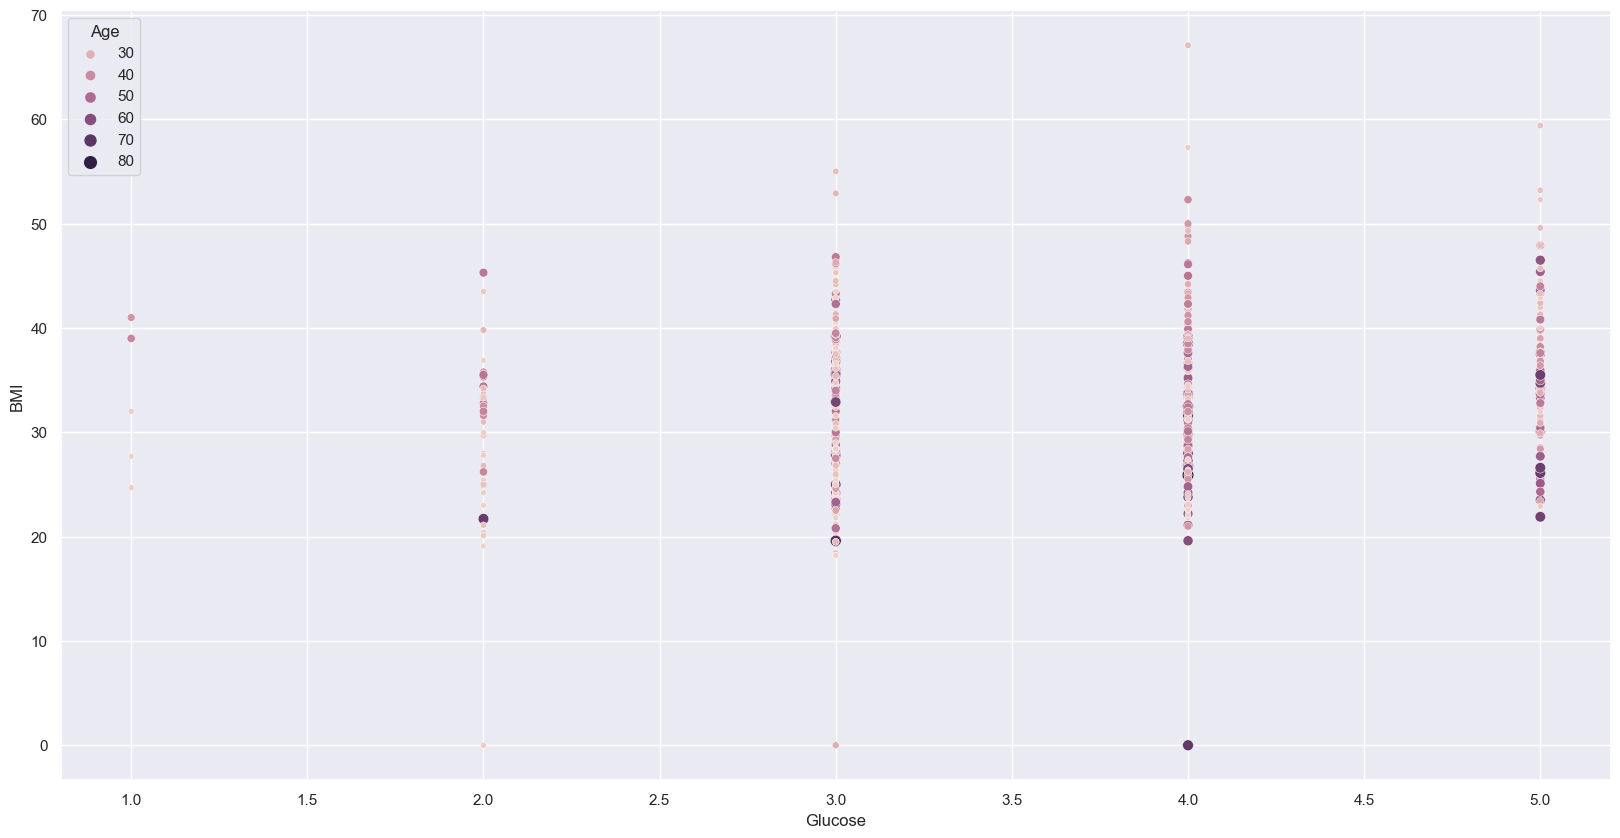

In [37]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="Glucose", y="BMI", hue="Age", size="Age")
plt.show()

draw subplot and histplot for all data

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

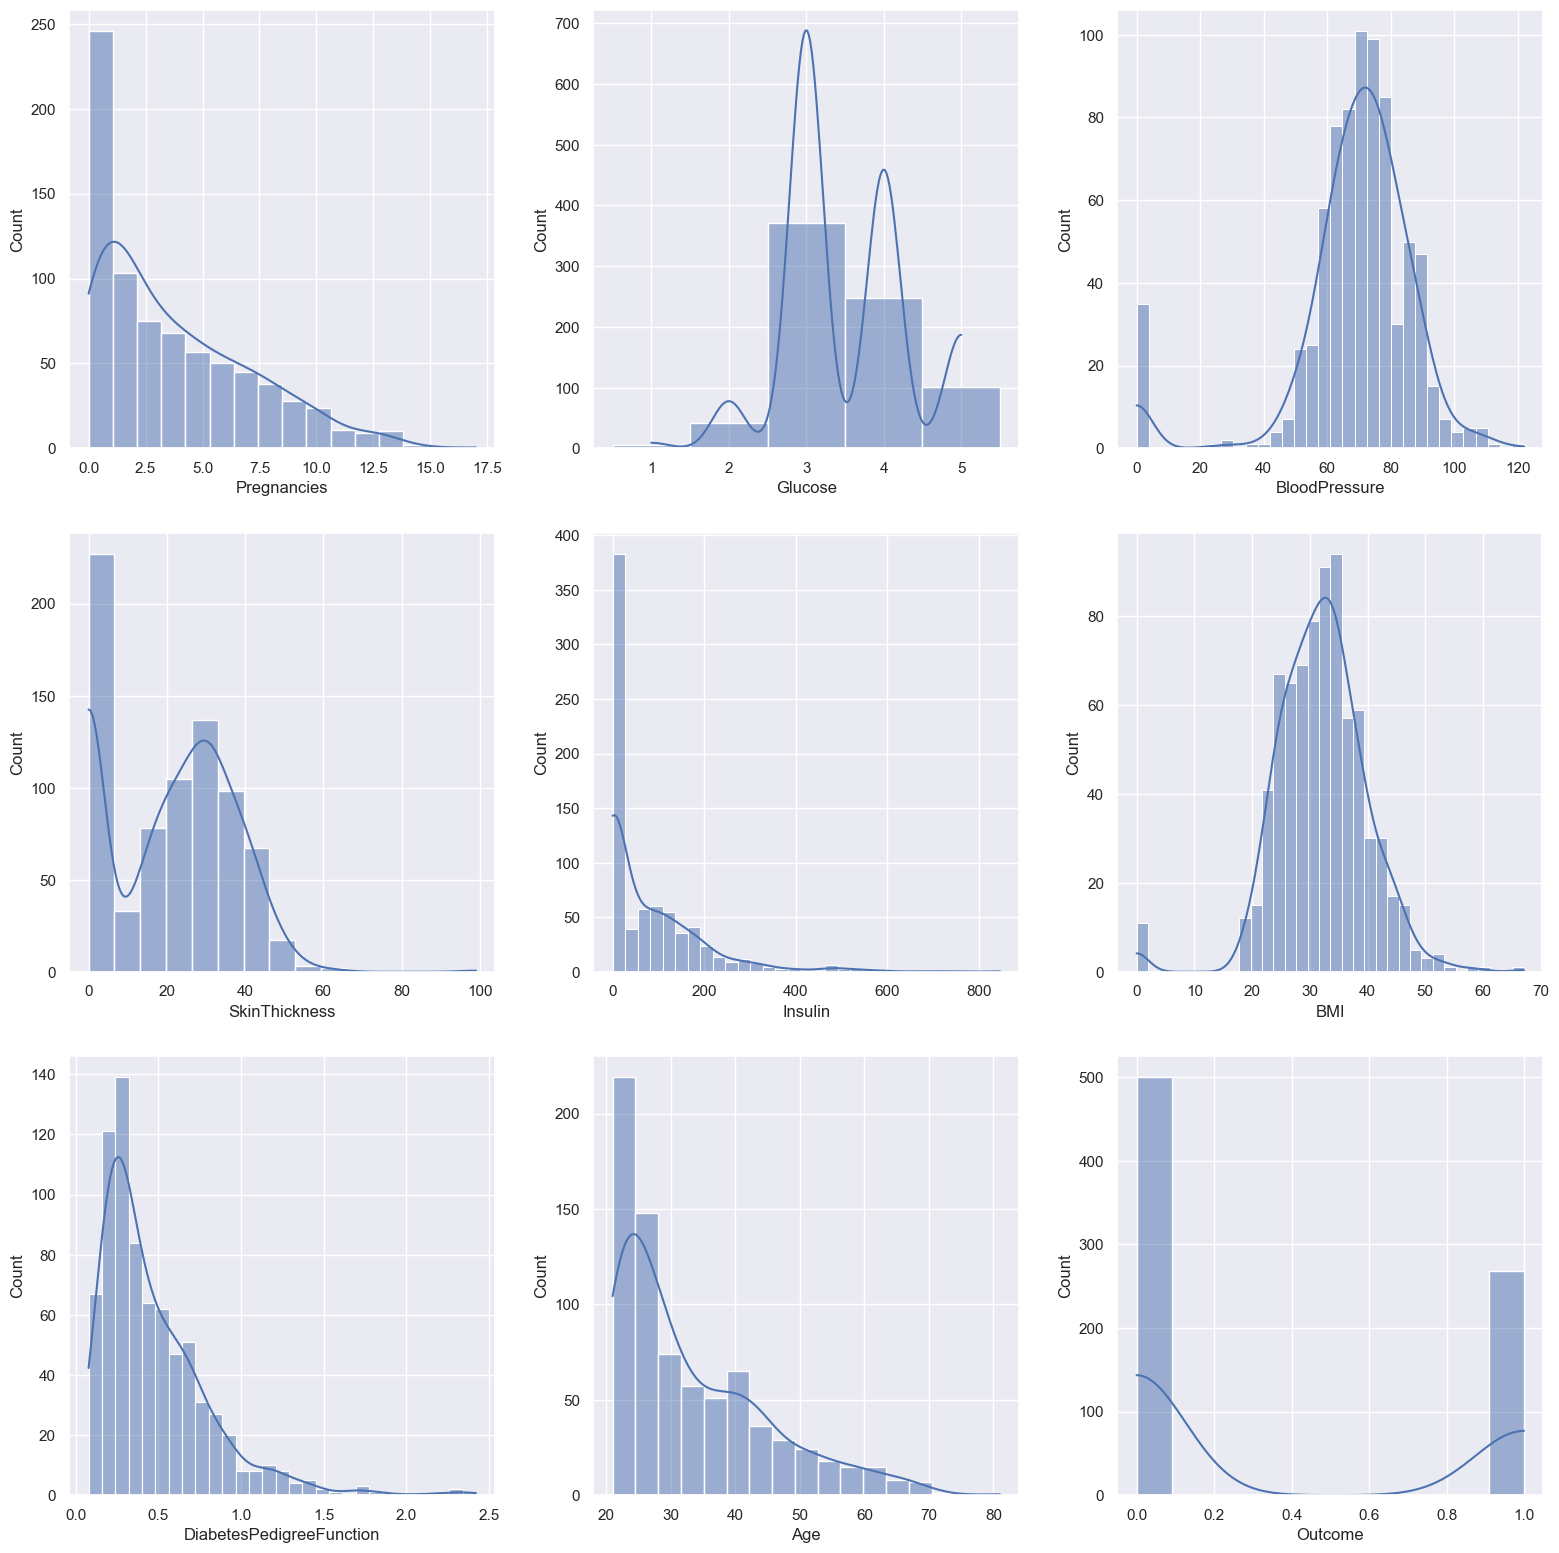

In [40]:
fig = plt.figure(figsize = (16, 16))
for index, col in enumerate(data):
    plt.subplot(3, 3, index +1)
    sns.histplot(data.loc[:, col], kde = True)
fig.tight_layout(pad = 2)
plt.show()

draw subplot and boxplot to all data with outcome

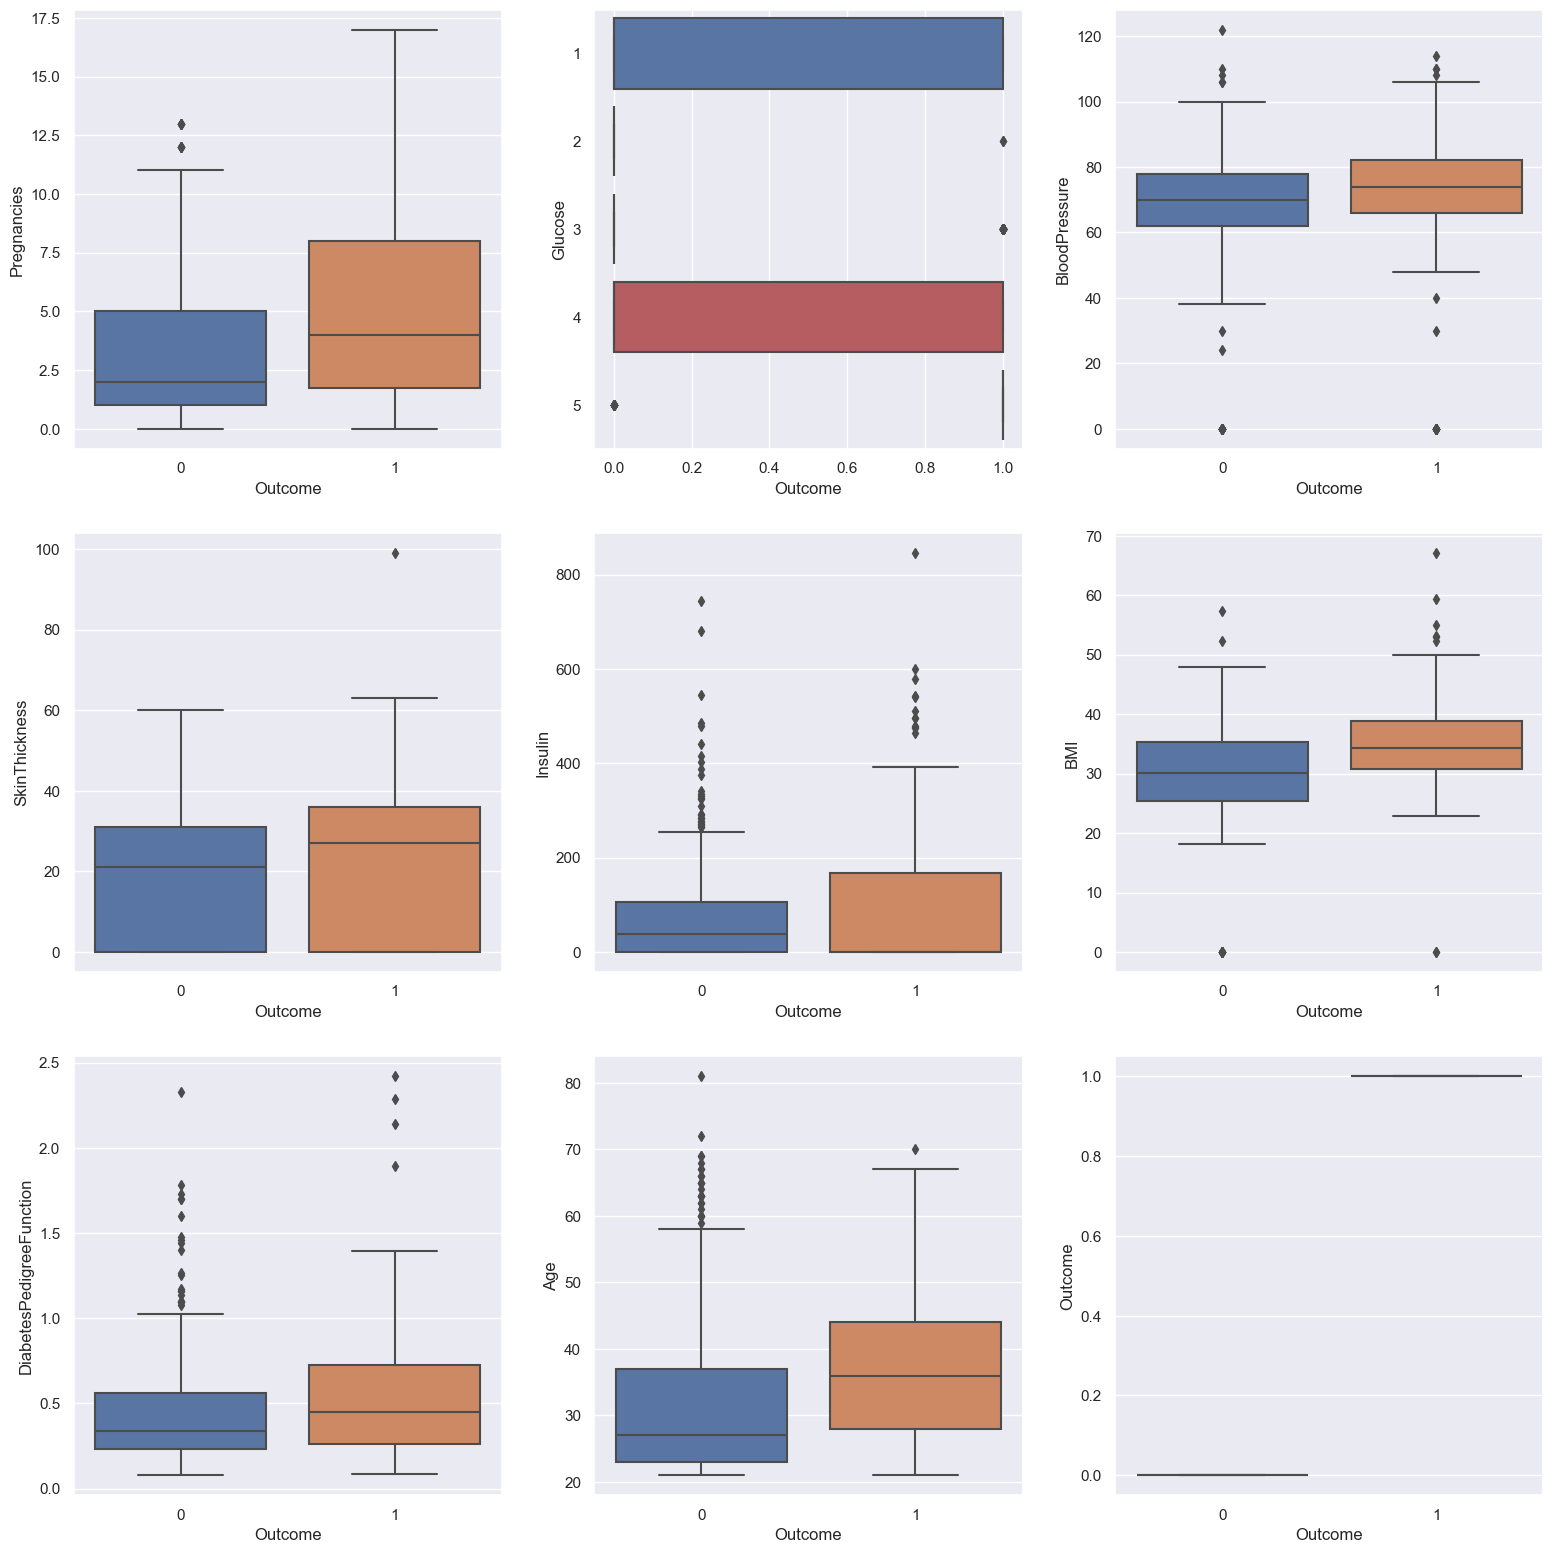

In [41]:
fig = plt.figure(figsize = (16, 16))
for index, col in enumerate(data):
    plt.subplot(3, 3, index +1)
    sns.boxplot(x='Outcome',y = col, data = data)
fig.tight_layout(pad = 2)
plt.show()

# Model Development

Splitting the Data to x and y

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=data.iloc[:,:-1]
y=data['Outcome']

make x as a dataframe

In [45]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [46]:
x

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.592514       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -0.637353      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.822380      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.637353      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.592514      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.637353       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.592514       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.592514       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.592514      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.637353       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496  
..                        ...       ...  
763                 -0.908682  2.532136  
764                 -0.398282 -0.531023  
765                 -0.685193 -0.275760  
766                 -0.371101  1.170732  
767                 -0.473785 -0.871374  

[768 rows x 8 columns]

draw kdeplot to x (features)

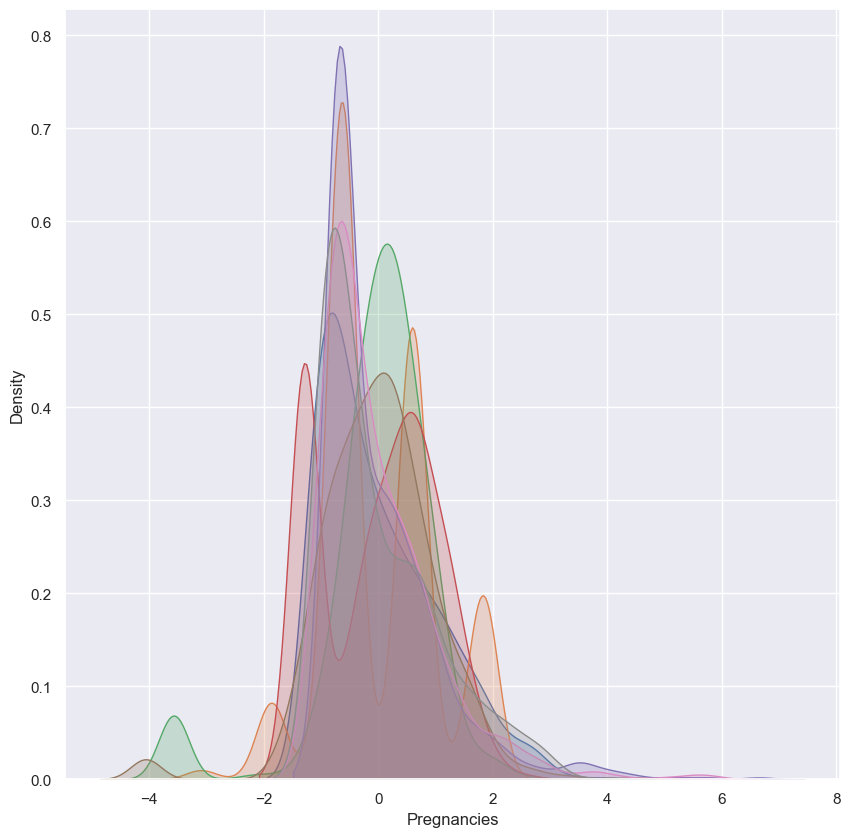

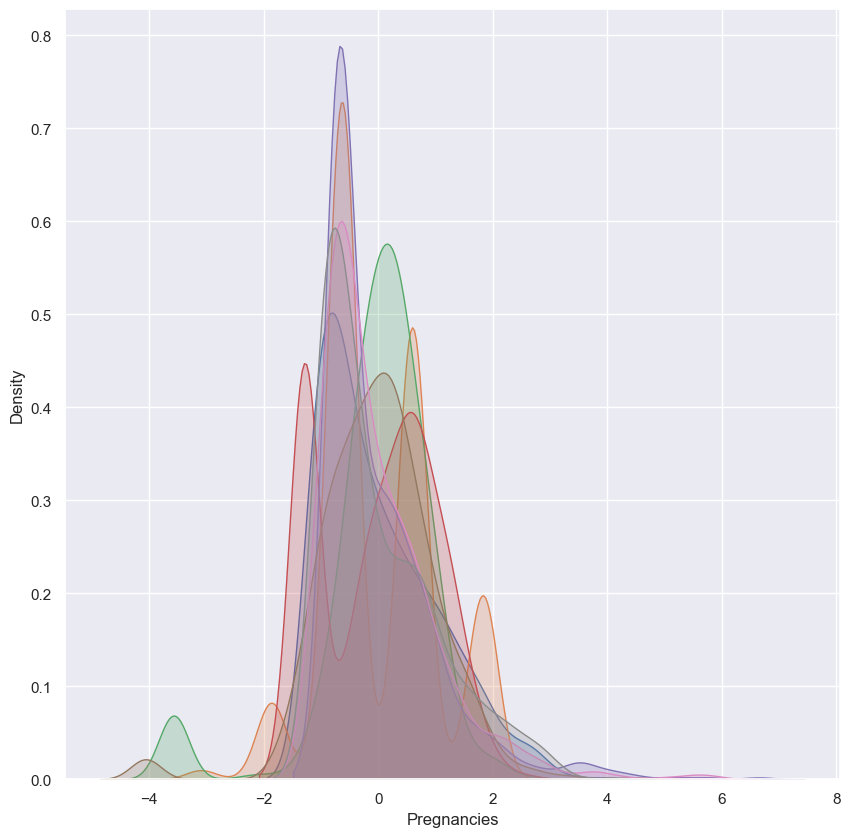

In [48]:
plt.figure(figsize=(10,10))
for column in x.columns:
    sns.kdeplot(x[column],shade=True)
plt.show()

draw kdeplot to y (0,1)

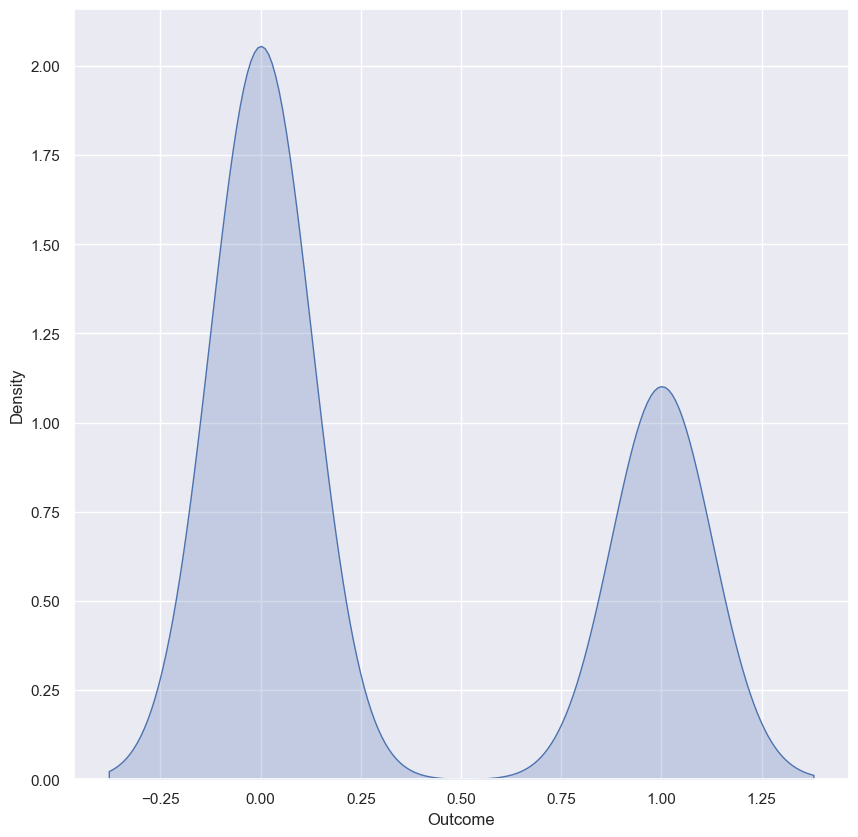

In [49]:
plt.figure(figsize=(10,10))
sns.kdeplot(y,shade=True)
plt.show()

put age in variable called counts

In [52]:
counts=data['Age'].value_counts()

In [53]:
counts

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

turn counts to list

In [54]:
counts=counts.index.values.tolist()

draw pie plot to counts

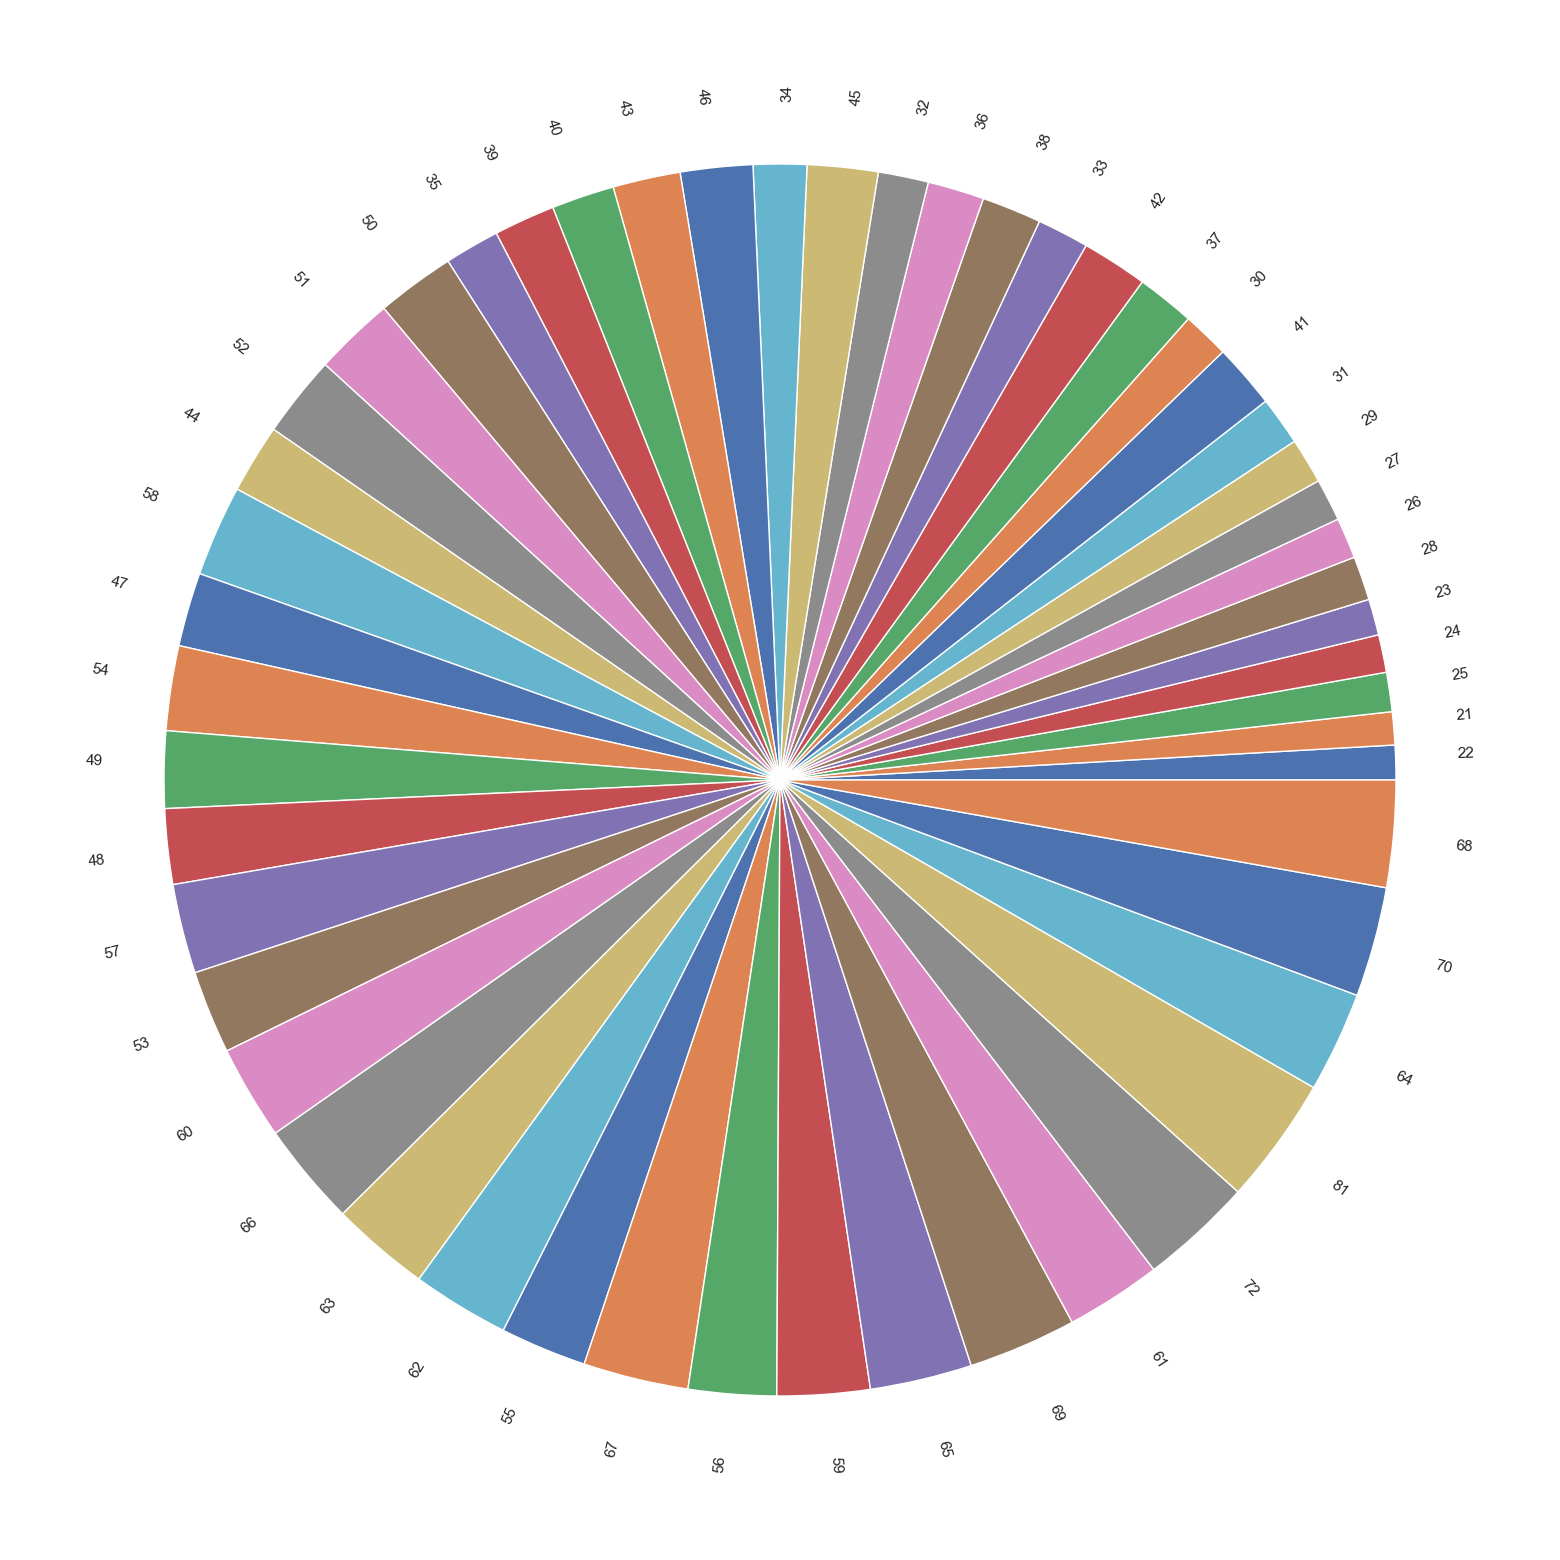

In [55]:
plt.figure(figsize=(20,20))
plt.pie(counts,labels=counts,rotatelabels=True)
plt.show()

# Machine Learning Models

In [56]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

In [58]:
features = data.drop(["Outcome"], axis=1)
labels = data["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=7)

In [61]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(231, 8)
(537, 8)
(231,)
(537,)


Evaluate Models,compare accuarcy 

In [64]:
def evaluate_model(models):
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    plt.show()
    return result_df

Modeling step Test differents algorithms

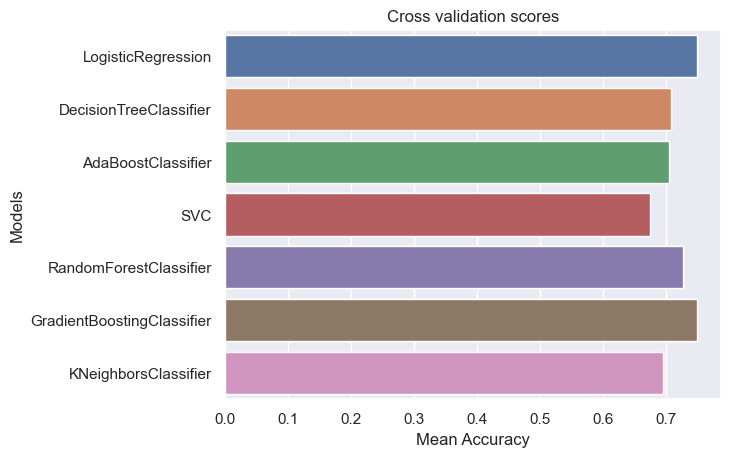

CrossValMeans  CrossValerrors                      Models
0       0.750524        0.057867          LogisticRegression
1       0.707862        0.060508      DecisionTreeClassifier
2       0.706010        0.073636          AdaBoostClassifier
3       0.675996        0.026138                         SVC
4       0.728162        0.051762      RandomForestClassifier
5       0.750559        0.092927  GradientBoostingClassifier
6       0.696331        0.045761        KNeighborsClassifier

In [65]:
 
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

Model:RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier(random_state=46).fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
accuracy_score(y_pred, y_test)

data.head()

Pregnancies Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       4             72             35        0  33.6   
1            1       3             66             29        0  26.6   
2            8       5             64              0        0  23.3   
3            1       3             66             23       94  28.1   
4            0       4             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

      Value                   Feature
5  0.194035                       BMI
6  0.156690  DiabetesPedigreeFunction
7  0.153666                       Age
1  0.136954                   Glucose
2  0.102371             BloodPressure
0  0.090298               Pregnancies
4  0.088433                   Insulin
3  0.077552             SkinThickness


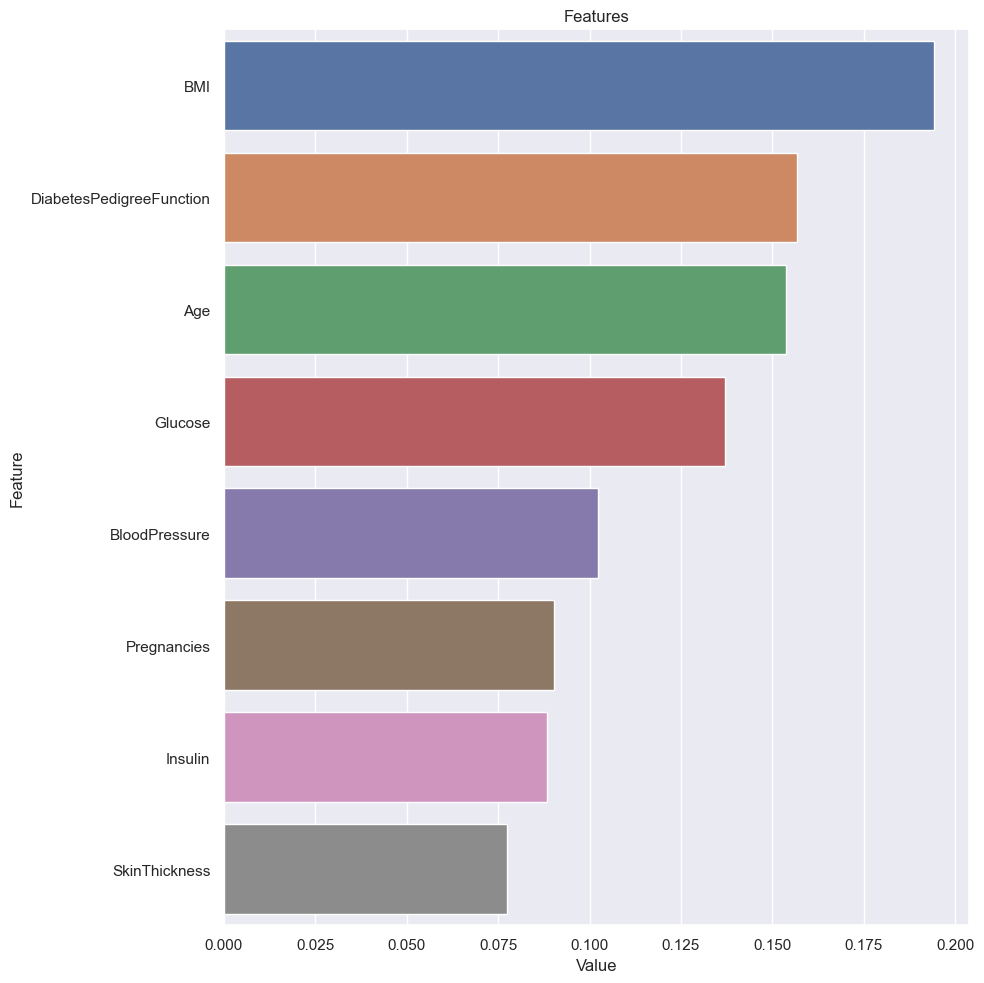

In [68]:
def plot_importance(model, features, num=len(x), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, x)

Model:LinearRegression

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error    
try:
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('predictions')
    print(y_pred)
    print('Accuarcy in every test case')
    a=y_test-y_pred
    print(a)
except ValueError as e:
    print('Error:', e)

predictions
[ 0.12736356  0.79998913  0.62065253  0.25656336  0.50223787  0.52510185
  0.02845492  0.33483639  0.87005303  0.18349032  0.82721804  0.20958244
  0.56387767  0.78106111  0.5968179   0.18633309  0.41247448  0.16690294
  0.22674628  0.29074731  0.38259048  0.4073791   0.76963295  0.55618623
  0.19207493  0.20040807  0.07745236  0.48992586  0.28476938  0.33840164
  0.56751449  0.41941861  0.25732308  0.71914918  0.04798684  0.20527801
  0.40814655  0.25366766  0.49754611  0.58111072  0.66285488  0.58331693
  0.34986334 -0.0640634   0.1997347   0.26341478  0.56787767  0.35165088
  0.59844657  0.80264557  0.30643846  0.09164938  0.46929877  0.15543357
  0.4290312   0.41452885  0.27294558  0.02903269  0.12049881  0.29539551
  0.15341686  0.7549653   0.14841994  0.63653056  0.52529654  0.53979927
  0.2877078   0.56309249  0.68063461  0.3961638   0.8278627   0.6376357
  0.18283934  0.23457318  0.43124432  0.44812831  0.24448386  0.15116818
 -0.0680813   0.11975377  0.21888226  0.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


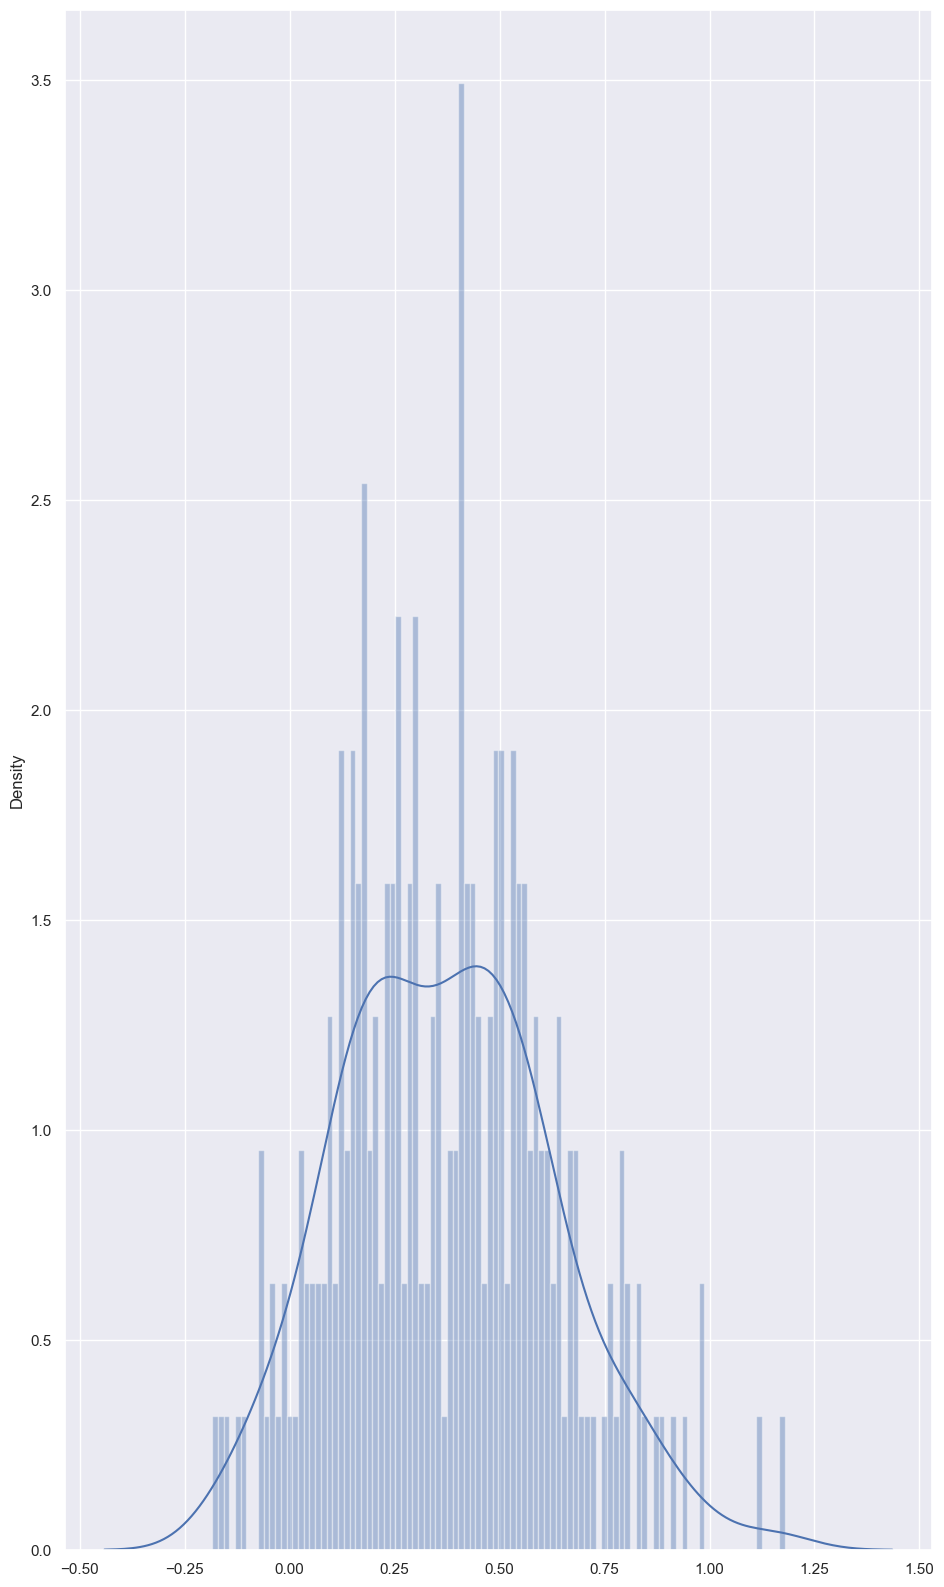

In [74]:
sns.distplot(y_pred, color='b', bins=100, hist_kws={'alpha': 0.4})
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


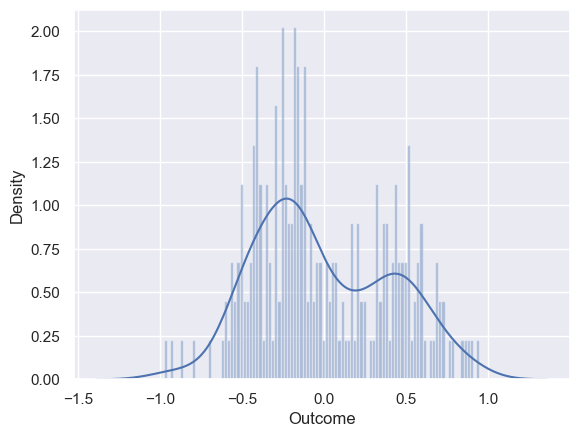

In [76]:
sns.distplot(a, color='b', bins=100, hist_kws={'alpha': 0.4})
plt.show()

# notebook end